## 匯入套件

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from numpy import nan
import datatable as dt
%matplotlib inline 
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.__version__ 

'0.24.2'

In [3]:
import os
print(os.listdir())

['1Q Beta_Monthly.xlsm', '.DS_Store', '1Q Beta_Monthly.xlsx', '.localized', 'RANK IC之 AI 模型建立與預測_V7.ipynb', '1Q Beta_Monthly IC.xlsm', 'INTRODUCTION TO COMPUTER SCIENCE', 'LinkedIn Learning', 'Price_Monthly.xlsx', 'cat_feature_index.7b620daf-14819d6-168faeba-7ecb589a.tmp', 'SeCondton', 'LOG RETURN + RANK IC_V4.ipynb', '期末報告.pdf', '.ipynb_checkpoints', 'INTRODUCTION TO MACHINE LEARNING', '1Q_Chg._Alpha_Monthly.xlsx', 'GMAT 檢討folder', '正式GMAT', 'catboost_info', 'RANK IC之 AI 模型建立與預測_V7auto.ipynb']


In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 匯入資料

In [5]:
%%time
A = pd.read_excel("/Users/JackChang/Desktop/1Q_Chg._Alpha_Monthly.xlsx", header = 1, index_col = [1])
B = pd.read_excel("/Users/JackChang/Desktop/1Q Beta_Monthly.xlsx", index_col = [1])
P = pd.read_excel("/Users/JackChang/Desktop/Price_Monthly.xlsx", header = 1, index_col = [1])

print(A.shape, B.shape, P.shape)

(929, 188) (929, 188) (947, 231)
CPU times: user 10.9 s, sys: 105 ms, total: 11 s
Wall time: 11.1 s


In [6]:
A = A.drop(columns=0)
B = B.drop(columns=0)
P = P.drop(columns=0)

In [9]:
A.head()

,2003-08-29 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-28 00:00:00,2003-12-31 00:00:00,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,...,2018-05-31 00:00:00,2018-06-29 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-28 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-28 00:00:00,2019-01-30 00:00:00,2019-02-15 00:00:00
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,-0.024551,0.131891,3.130266,-1.016691,2.346694,0.252612,-0.688769,-2.926818,-1.141752,1.166668,...,-0.910244,-10.393053,-23.015173,-0.752457,1.328304,-10.207301,-6.912352,1.249354,-1.556327,2.440854
1102 亞泥,18.648229,-1.758870,2.525108,-0.759694,2.778894,-1.369308,0.849928,-5.041986,1.475773,-1.795656,...,-11.793884,-0.900626,6.193500,-1.733042,-0.198339,-0.362142,0.599440,0.534612,-0.640191,2.142452
1103 嘉泥,-1.715975,0.937963,10.827970,-0.396150,-1.069951,-2.583057,1.888964,-3.454714,0.189841,0.928217,...,4.418536,-1.137669,4.772636,-1.622019,1.172524,-0.252023,3.132344,-1.328023,0.269661,0.959433
1104 環泥,-0.649836,0.779258,-0.043691,-0.707782,3.431607,-1.483043,-0.965630,0.484807,-0.657747,2.281051,...,-0.619362,-0.129130,0.289740,1.825177,-4.169338,0.582927,-6.238107,1.704429,1.173111,3.696241
1108 幸福,1.126140,8.258490,-0.538211,3.131946,7.693873,-0.746704,-1.746718,-0.987922,-3.596477,0.437644,...,6.843780,-1.583776,-0.512914,1.309374,6.558411,1.656550,0.472861,-0.392850,-0.871398,3.589260


In [10]:
B.head()

,2003-07-31 00:00:00,2003-08-29 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-28 00:00:00,2003-12-31 00:00:00,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,...,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-29 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-28 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-28 00:00:00,2019-01-30 00:00:00
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,0.248468,0.457081,-0.606111,0.439133,0.788294,0.387501,0.673769,1.094174,1.176163,1.123665,...,0.826580,1.415035,1.230865,0.870339,1.257571,0.839612,0.953791,2.468596,0.292800,0.848190
1102 亞泥,0.550002,0.303757,0.850514,0.271626,-0.220979,0.110071,2.317105,2.265940,1.220087,-0.122660,...,1.775057,1.282841,1.252602,-0.069321,1.985367,3.665937,1.161250,2.352823,0.376283,0.818753
1103 嘉泥,0.125133,1.411335,0.207278,-0.147610,-1.336026,0.306507,2.083481,-0.552637,1.322985,0.637196,...,-0.094815,-0.802354,0.661817,0.393874,1.381632,0.827727,0.477737,2.124512,0.953228,0.706501
1104 環泥,-0.437868,0.657981,0.843387,0.850285,0.838248,0.218097,1.649277,1.554481,1.096707,0.515812,...,0.287746,0.449666,0.296176,0.477320,0.114973,0.509802,0.168537,0.279603,0.006733,0.181083
1108 幸福,0.953807,0.544747,-0.185798,2.390253,-0.842438,-1.189548,0.972746,0.266159,0.679850,2.447640,...,0.146424,0.292702,-0.017281,0.290075,0.037969,-0.190347,0.125402,-0.091904,0.164450,-0.165409


In [11]:
P.head()

,1999-12-28 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-29 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,...,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-29 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-28 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-28 00:00:00,2019-01-30 00:00:00
證券代碼,,,,,,,,,,,,,,,,,,,,,
1101 台泥,32.40,38.30,43.1,34.30,25.0,27.90,24.40,24.80,19.60,16.80,...,40.85,43.60,42.35,39.35,42.35,41.10,34.70,34.50,35.60,37.35
1102 亞泥,27.60,30.10,32.8,28.00,22.4,23.20,20.00,22.60,16.90,13.90,...,31.75,33.05,33.50,40.80,41.85,41.50,32.75,33.70,33.95,36.45
1103 嘉泥,9.85,11.40,11.7,10.65,9.1,9.45,9.00,10.15,7.25,6.95,...,11.95,13.30,12.85,14.75,14.50,13.90,11.50,14.10,13.60,13.80
1104 環泥,9.50,11.30,10.7,10.15,9.1,9.00,7.45,7.80,6.05,5.20,...,22.00,21.10,20.10,19.95,20.50,20.20,18.75,18.95,18.90,19.30
1108 幸福,10.00,11.65,11.8,10.20,9.4,9.00,8.10,8.20,7.70,5.60,...,7.62,8.12,7.94,7.95,7.85,7.88,7.17,7.40,7.34,7.46


# 資料處理 Data Preprocessing
## 檢查空值／drop空值

In [12]:
null_value_stats = A.isnull().sum(axis=1) #axis=0是指rows的意思
null_value_stats[null_value_stats != 0];

In [13]:
B = B.replace(0, nan)
#B = B.dropna(axis=0, how="any")
null_value_stats = B.isnull().sum(axis=1) #axis=0是指rows的意思
null_value_stats[null_value_stats != 0];

In [14]:
A = A.dropna(axis=0, how="any")
B = B.dropna(axis=0, how="any")
print(A.shape, B.shape, P.shape)

(603, 187) (603, 187) (947, 230)


In [15]:
A = A.iloc[:, :-1]
B = B.iloc[:, 1:]
print(A.shape, B.shape, P.shape)

(603, 186) (603, 186) (947, 230)


# PART1 計算log return(以10為底)
## P log return

In [16]:
#np.log10(1+P.pct_change(periods=1, axis=1))
P_return = np.log10(P / P.shift(axis=1))

In [17]:
P_return.shape

(947, 230)

In [18]:
P_return_rank = P_return
P_return_rank = P_return_rank.drop(P_return_rank.index.difference(B.index))
P_return_rank = P_return_rank.drop(P_return_rank.columns.difference(B.columns), axis=1)
P_return_rank

,2003-08-29 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-28 00:00:00,2003-12-31 00:00:00,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,...,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-29 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-28 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-28 00:00:00,2019-01-30 00:00:00
證券代碼,,,,,,,,,,,,,,,,,,,,,
1101 台泥,0.019383,-0.012234,0.144860,-0.054019,0.043740,0.042101,0.036212,-0.036212,-0.111003,0.030877,...,0.048305,0.028294,-0.012633,-0.031909,0.031909,-0.013012,-0.073512,-0.002510,0.013631,0.020841
1102 亞泥,0.032185,-0.032185,0.090177,-0.025405,0.037570,0.058292,0.058778,-0.030356,-0.106346,0.026772,...,0.046138,0.017428,0.005873,0.085615,0.011035,-0.003647,-0.102837,0.012419,0.003210,0.030858
1103 嘉泥,0.005201,-0.034978,0.121422,-0.008558,-0.002166,0.012837,0.014512,-0.061208,-0.125722,0.054450,...,0.011042,0.046484,-0.014949,0.059889,-0.007424,-0.018353,-0.082317,0.088521,-0.015680,0.006340
1104 環泥,0.041393,0.007825,0.092232,-0.022524,0.016207,0.040959,0.005752,-0.023481,-0.054559,-0.012137,...,-0.005882,-0.018140,-0.021086,-0.003253,0.011811,-0.006402,-0.032350,0.004608,-0.001147,0.009096
1108 幸福,0.006062,0.000000,0.135558,-0.046457,0.156998,0.052776,0.023140,-0.031870,0.063469,-0.029555,...,-0.009025,0.027601,-0.009736,0.000547,-0.005497,0.001657,-0.041007,0.013713,-0.003536,0.007043
1109 信大,0.005329,-0.013447,0.129017,-0.075141,0.032529,0.075810,-0.007586,-0.005778,-0.047052,-0.002166,...,-0.010877,0.000000,0.049049,0.012469,0.002723,-0.016599,-0.088877,0.074543,-0.033307,0.006249
1110 東泥,-0.006531,0.006531,0.087739,-0.044582,0.055048,0.062492,0.070133,-0.046181,-0.066241,0.019305,...,-0.001554,-0.003124,0.012365,-0.010800,0.001559,-0.001559,-0.001565,0.001565,0.086155,-0.015652
1201 味全,-0.032529,-0.027386,0.046271,-0.002316,0.011460,0.138303,0.020876,-0.012727,0.028130,-0.004564,...,-0.016288,0.006407,0.003619,-0.003619,-0.026215,-0.002905,-0.069383,0.058562,0.008874,-0.022020
1203 味王,-0.048550,-0.036517,0.105460,-0.016237,0.031889,0.120108,0.030934,-0.010995,-0.103219,-0.010724,...,-0.009179,0.000842,-0.001687,0.000844,-0.007657,0.001713,-0.013899,0.013043,0.010995,-0.000836


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca97048>,
      dtype=object)

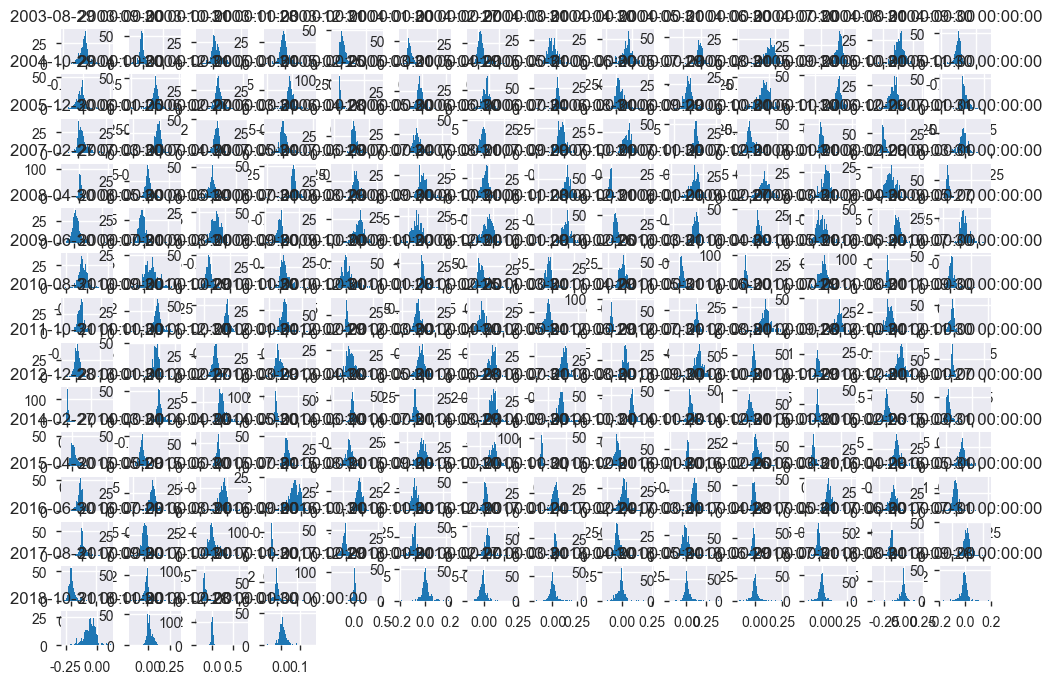

In [81]:
plt.rcParams['axes.unicode_minus']=False
P_return_rank.hist(bins=100, figsize=(12, 8))

In [19]:
print(A.shape, B.shape, P_return_rank.shape)

(603, 186) (603, 186) (603, 186)


# PART2+3  alpha跟beta rank & 計算Correlation
## .corrwith() spearman二合一

In [20]:
IC = pd.DataFrame(index=A.columns, columns=["A_IC", "B_IC"])
IC["A_IC"] = A.corrwith(P_return_rank, method="spearman")
IC["B_IC"] = B.corrwith(P_return_rank, method="spearman")

In [21]:
IC

,A_IC,B_IC
2003-08-29,0.486781,-0.154339
2003-09-30,0.187281,0.026146
2003-10-31,0.363115,0.204945
2003-11-28,0.352194,0.113152
2003-12-31,0.439634,-0.122337
2004-01-30,0.460128,0.056864
2004-02-27,0.236313,0.156451
2004-03-31,0.588249,-0.221724
2004-04-30,0.141071,0.214952
2004-05-31,0.333748,-0.064295


In [22]:
AA = A.T
BB = B.T
AA["A_IC"] = IC["A_IC"]
BB["B_IC"] = IC["B_IC"]

In [23]:
AA

公司,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9937 全國,9938 百和,9939 宏全,9940 信義,9941 裕融,9942 茂順,9943 好樂迪,9944 新麗,9945 潤泰新,A_IC
2003-08-29,-0.024551,18.648229,-1.715975,-0.649836,1.126140,1.549451,6.089223,-0.581065,-1.550091,0.621318,...,0.534294,-245.361772,-4.350774,1.044195,4.218717,-1.539152,-2.713410,-1.881853,12.127804,0.486781
2003-09-30,0.131891,-1.758870,0.937963,0.779258,8.258490,2.010436,-0.234668,0.655061,1.201351,-1.916313,...,1.213135,1.226719,1.138393,-0.757174,1.735709,0.801934,1.687516,0.957211,-1.096774,0.187281
2003-10-31,3.130266,2.525108,10.827970,-0.043691,-0.538211,-1.320697,-1.372903,0.521918,-3.949510,0.774385,...,-21.849198,-2.647477,-1.284446,-1.319582,-1.941922,1.714366,0.473801,10.272925,-0.898695,0.363115
2003-11-28,-1.016691,-0.759694,-0.396150,-0.707782,3.131946,-9.295153,7.359625,6.210913,2.295156,10.093276,...,-0.711231,0.841140,3.565674,0.478036,2.011298,1.581182,-1.231221,-0.996140,32.062855,0.352194
2003-12-31,2.346694,2.778894,-1.069951,3.431607,7.693873,5.010561,1.327336,-0.511208,8.851762,-0.726214,...,0.642217,3.105865,284.769601,-0.300418,8.414085,10.842453,12.122882,-0.172303,-0.206015,0.439634
2004-01-30,0.252612,-1.369308,-2.583057,-1.483043,-0.746704,0.435361,-0.634720,29.806573,2.898492,3.842186,...,1.066690,0.034303,1.685653,1.336863,0.299657,-0.310388,-1.408517,0.890063,-1.087436,0.460128
2004-02-27,-0.688769,0.849928,1.888964,-0.965630,-1.746718,-1.987899,-2.638910,-0.457282,-2.104196,-5.072410,...,-13.038084,-5.404038,-0.216357,-1.262376,-0.123701,-3.463162,0.947401,13.087591,11.525059,0.236313
2004-03-31,-2.926818,-5.041986,-3.454714,0.484807,-0.987922,0.570533,-39.389454,-0.776104,1.619266,11.345196,...,2.420789,2.287216,-1.555610,-1.429435,-0.985856,4.303276,0.374225,-1.041127,-1.112325,0.588249
2004-04-30,-1.141752,1.475773,0.189841,-0.657747,-3.596477,-1.502455,-1.502084,14.655678,-11.381444,-1.185864,...,-4.337987,2.090664,-1.646083,-4.738968,0.506925,0.167757,-1.331656,-7.736256,0.349572,0.141071
2004-05-31,1.166668,-1.795656,0.928217,2.281051,0.437644,0.898122,0.683890,-4.565825,1.001337,-1.112482,...,1.497477,21.112589,0.859925,0.669455,-2.261320,-2.979568,0.736936,0.341375,3.750829,0.333748


In [24]:
BB

公司,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9937 全國,9938 百和,9939 宏全,9940 信義,9941 裕融,9942 茂順,9943 好樂迪,9944 新麗,9945 潤泰新,B_IC
2003-08-29,0.457081,0.303757,1.411335,0.657981,0.544747,0.391981,-0.422774,1.092046,0.247140,0.374956,...,0.378874,-0.075230,0.611347,-0.387379,0.148689,0.666208,0.479344,0.792025,0.907799,-0.154339
2003-09-30,-0.606111,0.850514,0.207278,0.843387,-0.185798,0.690673,-0.254971,0.239164,-1.024587,0.659072,...,-0.463071,0.173871,-0.305919,-0.338458,-0.077945,0.249505,-0.226180,0.310556,0.352107,0.026146
2003-10-31,0.439133,0.271626,-0.147610,0.850285,2.390253,2.087632,2.334834,0.904253,1.606331,0.771776,...,0.197689,0.091608,0.637000,0.449415,0.758693,0.029550,-0.005016,-0.212998,1.214120,0.204945
2003-11-28,0.788294,-0.220979,-1.336026,0.838248,-0.842438,0.071664,-1.744711,-0.967690,-0.663076,-1.082381,...,0.258066,-0.550386,-0.837690,0.983890,-0.076398,-0.190058,0.649263,1.544183,-0.272097,0.113152
2003-12-31,0.387501,0.110071,0.306507,0.218097,-1.189548,-0.673355,-2.244633,0.250923,0.713646,0.587251,...,0.196976,-0.633103,-0.520159,1.012915,-0.246993,-0.399154,-1.017138,0.095142,-0.786128,-0.122337
2004-01-30,0.673769,2.317105,2.083481,1.649277,0.972746,0.265174,0.698440,-0.072200,0.525098,0.191494,...,-0.072839,-0.207305,-0.150794,0.741282,0.137475,0.038398,0.718957,0.869710,1.281744,0.056864
2004-02-27,1.094174,2.265940,-0.552637,1.554481,0.266159,1.973410,1.823606,-0.705848,1.178359,2.410876,...,0.479555,2.310204,-0.921296,0.285481,0.401969,0.699119,1.304200,-1.594224,0.124588,0.156451
2004-03-31,1.176163,1.220087,1.322985,1.096707,0.679850,1.144996,0.716308,1.007643,0.793078,0.522673,...,0.377098,0.905450,1.119526,1.227211,0.519457,0.275358,-0.281458,0.639938,0.917898,-0.221724
2004-04-30,1.123665,-0.122660,0.637196,0.515812,2.447640,0.511823,1.515967,1.833985,1.411724,0.523174,...,0.630486,-0.030342,0.877081,0.853452,0.214284,-0.088199,0.017687,0.746975,0.166497,0.214952
2004-05-31,1.357974,1.487391,1.661412,0.854561,1.377028,0.974589,1.471201,1.561988,1.265694,1.037162,...,-0.083663,0.556415,0.901276,1.117035,0.787950,0.579453,0.479160,0.875200,0.637911,-0.064295


# PART4 預測分析model
## machine learning預測分析

In [26]:
#AA
train_AA = AA.iloc[:-1, :]
test_AA = AA.tail(1)
#BB
train_BB = BB.iloc[:-1, :]
test_BB = BB.tail(1)

In [27]:
#AA
X_features_AA = train_AA.iloc[:, :-1].values
X_target_AA = train_AA.iloc[:, -1].values

y_features_AA = test_AA.iloc[:, :-1].values
#BB
X_features_BB = train_BB.iloc[:, :-1].values
X_target_BB = train_BB.iloc[:, -1].values

y_features_BB = test_BB.iloc[:, :-1].values

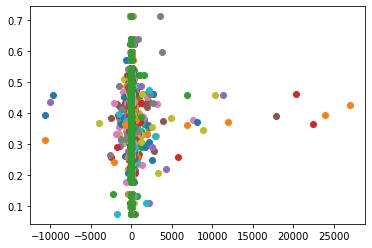

In [25]:
plt.plot(X_features_AA, X_target_AA, 'o')

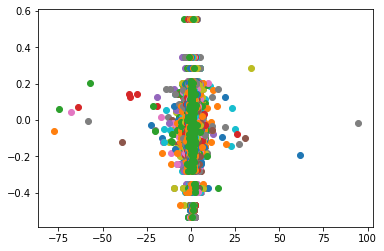

In [26]:
plt.plot(X_features_BB, X_target_BB, 'o')

### kfold CV Model Selection & Training

In [31]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from sklearn.metrics import mean_squared_error

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn import linear_model

import lightgbm as lgb
from lightgbm import Dataset
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

The scikit-learn version is 0.19.2.


/Users/JackChang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## AA

In [28]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LGB', LGBMRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('CB', CatBoostRegressor(silent=True)))

#models.append(('SGD', linear_model.SGDRegressor()))
#models.append(('BR', linear_model.BayesianRidge()))
models.append(('LL', linear_model.LassoLars()))
models.append(('ARD', linear_model.ARDRegression()))
#models.append(('PA', linear_model.PassiveAggressiveRegressor()))
#models.append(('TS', linear_model.TheilSenRegressor()))
#models.append(('LR', linear_model.LinearRegression()))

##models.append(('LR', LogisticRegression()))
##models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GDBT', GradientBoostingRegressor()))
models.append(('SVM', SVR()))

In [29]:
%%time
# evaluate each model in turn
results = []
names = []
means = []
stds = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_features_AA, X_target_AA, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean()) #
    stds.append(cv_results.std()) #
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LGB: -0.013263 (0.004828)
[16:00:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: -0.012054 (0.003749)
CB: -0.011401 (0.004456)
LL: -0.010441 (0.004159)
ARD: -0.010441 (0.004159)
KNN: -0.011383 (0.003210)
CART: -0.021831 (0.003378)
RF: -0.011934 (0.004393)
ET: -0.012329 (0.003560)
GDBT: -0.012696 (0.003364)
SVM: -0.010687 (0.004581)
CPU times: user 1h 55min 41s, sys: 2min 20s, total: 1h 58min 1s
Wall time: 19min 9s


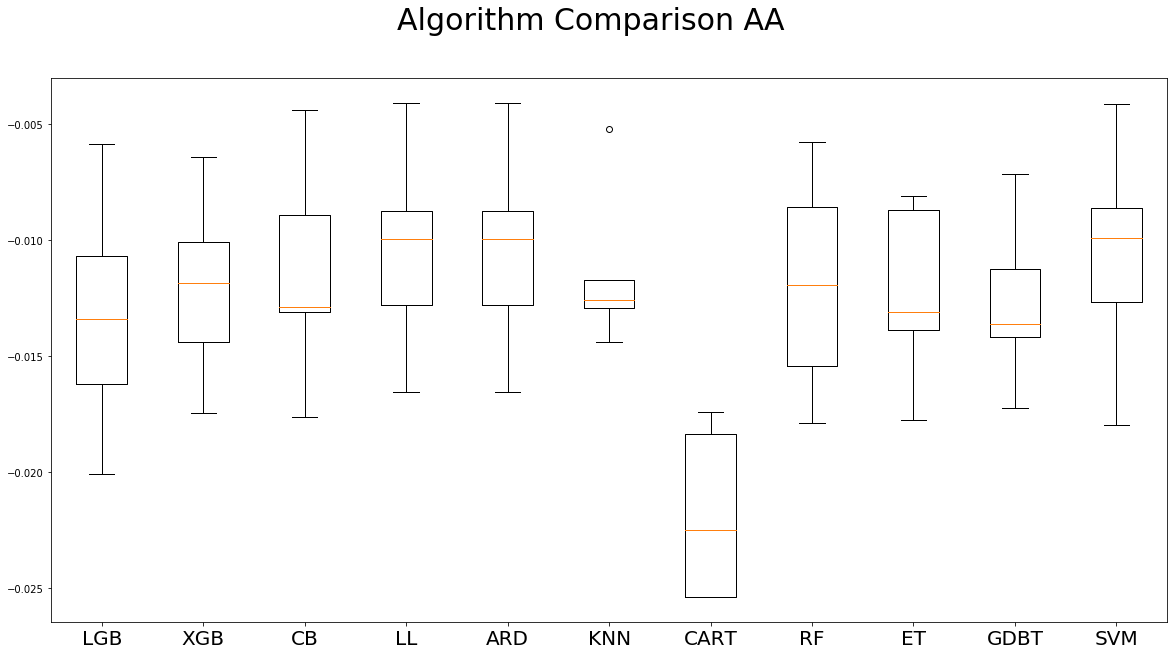

In [30]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison AA', fontsize=30)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=20)
plt.show()

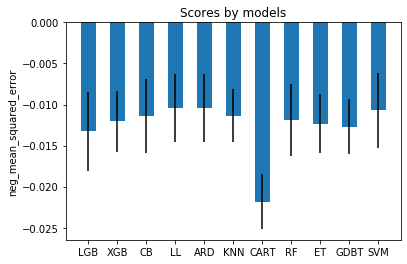

In [31]:
x_loc = np.arange(len(models))
width = 0.5
models_graph = plt.bar(x_loc, means, width, yerr=stds)
plt.ylabel('neg_mean_squared_error')
plt.title('Scores by models')
plt.xticks(x_loc, names) # models name on x-axis
 
#add valve on the top of every bar
def addLabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width()/2., 1.05*height,
            '%f' % height, 
            ha='center', 
            va='bottom'
        )

        addLabel(models_graph)

        plt.show()

## BB

In [32]:
# prepare configuration for cross validation test harness
seed = 8
# prepare models
models = []
models.append(('LGB', LGBMRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('CB', CatBoostRegressor(silent=True)))

#models.append(('SGD', linear_model.SGDRegressor()))
models.append(('BR', linear_model.BayesianRidge()))
models.append(('LL', linear_model.LassoLars()))
models.append(('ARD', linear_model.ARDRegression()))
models.append(('PA', linear_model.PassiveAggressiveRegressor()))
models.append(('TS', linear_model.TheilSenRegressor()))
models.append(('LR', linear_model.LinearRegression()))

##models.append(('LR', LogisticRegression()))
##models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GDBT', GradientBoostingRegressor()))
models.append(('SVM', SVR()))

In [33]:
%%time
# evaluate each model in turn
results = []
names = []
means = []
stds = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_features_BB, X_target_BB, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean()) #
    stds.append(cv_results.std()) #
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LGB: -0.023707 (0.009277)
[16:19:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: -0.024227 (0.010581)
CB: -0.020616 (0.009102)
BR: -0.039329 (0.009656)
LL: -0.021898 (0.009867)
ARD: -0.072399 (0.013574)
PA: -0.025174 (0.010091)
TS: -0.038875 (0.009228)
LR: -0.039395 (0.009662)
KNN: -0.022516 (0.010948)
CART: -0.047724 (0.009842)
RF: -0.023778 (0.010103)
ET: -0.022386 (0.009018)
GDBT: -0.023786 (0.008871)
SVM: -0.021989 (0.010449)
CPU times: user 1h 55min 6s, sys: 2m

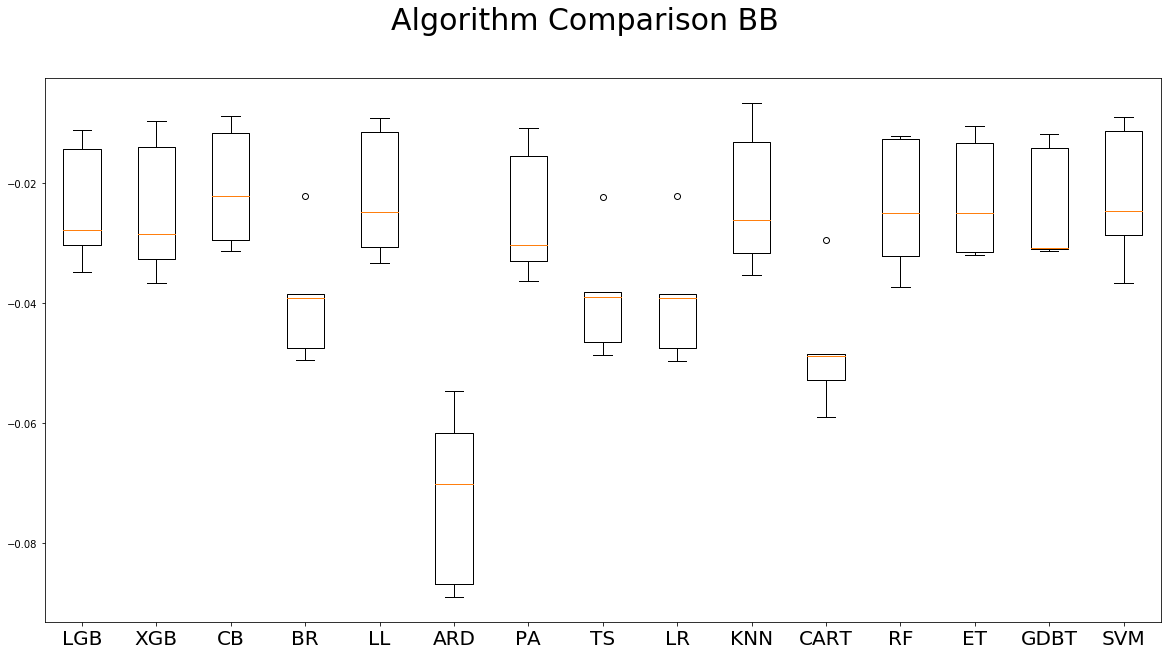

In [34]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison BB', fontsize=30)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=20)
plt.show()

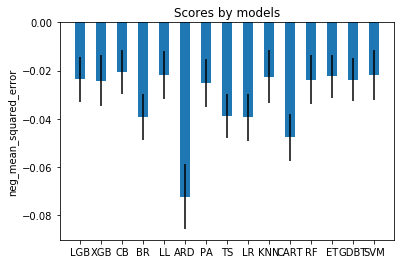

In [35]:
x_loc = np.arange(len(models))
width = 0.5
models_graph = plt.bar(x_loc, means, width, yerr=stds)
plt.ylabel('neg_mean_squared_error')
plt.title('Scores by models')
plt.xticks(x_loc, names) # models name on x-axis
 
#add valve on the top of every bar
def addLabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width()/2., 1.05*height,
            '%f' % height, 
            ha='center', 
            va='bottom'
        )

        addLabel(models_graph)

        plt.show()

# LIGHTGBM

### Automate Hyperparameter Optimization - Model Tuning
https://scikit-optimize.github.io/#skopt.BayesSearchCV

原始model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#AA
X_train_AA, X_test_AA, y_train_AA, y_test_AA = train_test_split(X_features_AA, X_target_AA, train_size=0.75, random_state=42)
X_test_AA = y_features_AA
#BB
X_train_BB, X_test_BB, y_train_BB, y_test_BB = train_test_split(X_features_BB, X_target_BB, train_size=0.75, random_state=42)
X_test_BB = y_features_BB

In [34]:
%%time
gbm = lgb.LGBMRegressor()
gbm.fit(X_features_AA, X_target_AA)
y_pred_lgbAA = gbm.predict(y_features_AA)
print(y_pred_lgbAA)

[0.36553518]
CPU times: user 1.18 s, sys: 26.5 ms, total: 1.2 s
Wall time: 174 ms


In [39]:
'''%%time
gbm = lgb.LGBMRegressor(boosting_type = 'gbdt', random_state=50, objective = 'regression', silent=1)
gbm.fit(X_train_AA, y_train_AA,
eval_set = [(X_test_AA, y_test_AA)],
        early_stopping_rounds=50)

y_pred_lgb = gbm.predict(y_test_AA, num_iteration = gbm.best_iteration)'''

"%%time\ngbm = lgb.LGBMRegressor(boosting_type = 'gbdt', random_state=50, objective = 'regression', silent=1)\ngbm.fit(X_train_AA, y_train_AA,\neval_set = [(X_test_AA, y_test_AA)],\n        early_stopping_rounds=50)\n\ny_pred_lgb = gbm.predict(y_test_AA, num_iteration = gbm.best_iteration)"

In [35]:
%%time
gbm = lgb.LGBMRegressor()
gbm.fit(X_features_BB, X_target_BB)
y_pred_lgbBB = gbm.predict(y_features_BB)
print(y_pred_lgbBB)

[-0.07004206]
CPU times: user 998 ms, sys: 69.7 ms, total: 1.07 s
Wall time: 167 ms


In [36]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import KFold 

In [37]:
# LGBMRegressor
lgbmodel = lgb.LGBMRegressor(boosting_type = 'gbdt', random_state=50, objective = 'regression', silent=1)

folds = KFold(n_splits=5, shuffle=True, random_state=1)

#lgb tuning parameter
lgb_search_space = {
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'max_depth': (3, 10),
        'min_child_samples': (0, 50),
        'min_child_weight': (0, 10),
        'n_estimators': (100, 400),
        'num_leaves': (10, 100),      
        'max_bin': (100, 1000),
        'subsample': (0.5, 1.0, 'uniform'),
        'subsample_freq': (0, 10),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
    }

In [38]:
lgbmodel

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent=1,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
lgb_bayes_tuner = BayesSearchCV(estimator = lgbmodel,
                                                search_spaces = lgb_search_space,
                                                scoring = 'neg_mean_squared_error',
                                                cv = folds,
                                                n_jobs=3,
                                                n_iter = 100,   
                                                verbose = 3,
                                                refit = True,
                                                random_state = 1,
                                                return_train_score = True)

In [40]:
def status_print(optim_result):
    """bayes參數優化過程中．．．"""

    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(lgb_bayes_tuner.cv_results_)    

    # Get current parameters and the best parameters    
    best_params = pd.Series(lgb_bayes_tuner.best_params_)
    print('Model #{}\nBest MSE: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(lgb_bayes_tuner.best_score_, 8),
        lgb_bayes_tuner.best_params_
    ))

    # Save all model results
    clf_name = lgb_bayes_tuner.estimator.__class__.__name__
    #all_models.to_csv(clf_name+"_cv_results.csv")

## AA

In [41]:
%%time
lgb_bayes_tuner.fit(X_train_AA, y_train_AA, callback=status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0 
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0 
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.00055688305634

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0, score=-0.01159613631493499, total=   0.2s
[CV]  colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0, score=-0.006963461612611194, total=   0.2s
Model #1
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_al

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV]  colsample_bytree=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #2
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1 
[CV] colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.67357974480709

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1, score=-0.014187579235140616, total=   0.8s
[CV]  colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1, score=-0.012236261729507576, total=   0.9s
[CV]  colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV]  c

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s


[CV]  colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8, score=-0.01296603070435457, total=   0.5s
[CV]  colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8, score=-0.009666171403773552, total=   0.7s
Model #4
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alph

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished


[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV]  colsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9, score=-0.011686349186155768, total=   0.4s
[CV]  colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9, score=-0.0076374984195178245, total=   0.4s
Model #5
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha'

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV]  colsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5, score=-0.008371168473594993, total=   0.4s
Model #6
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


[CV] colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9 
[CV] colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9 
[CV] colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9 
[CV]  colsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s


[CV]  colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9, score=-0.007199574891922937, total=   0.7s
[CV]  colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9, score=-0.012966368580189756, total=   0.8s
Model #7
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.1s finished


[CV] colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8 
[CV] colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8 
[CV] colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8 
[CV]  cols

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s


[CV]  colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8, score=-0.007385497321794602, total=   0.2s
[CV]  colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8, score=-0.013339644102339655, total=   0.2s
Model #8
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


[CV] colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2 
[CV] colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2 
[CV] colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2, score=-0.008984635388394021, total=   0.5s
[CV]  colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2, score=-0.013602929592833211, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #9
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3 
[CV] colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.4065999147239

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3, score=-0.013365853932515307, total=   0.5s
[CV]  colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3, score=-0.007997834721047918, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #10
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.06810165995206806, learning_rate=0.6725990869177743, max_bin=142, max_depth=9, min_child_samples=4, min_child_weight=2, n_estimators=114, num_leaves=13, reg_alpha=1.4071208941465105e-05, reg_lambda=2.479534556144216e-09, scale_pos_weight=1.4404583088882226e-06, subsample=0.9005100455951722, subsample_freq=9 
[CV] colsample_bytree=0.06810165995206806, learning_rate=0.6725990869177743, max_bin=142, max_depth=9, min_child_samples=4, min_child_weight=2, n_estimators=114, num_leaves=13, reg_alpha=1.40712

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.06810165995206806, learning_rate=0.6725990869177743, max_bin=142, max_depth=9, min_child_samples=4, min_child_weight=2, n_estimators=114, num_leaves=13, reg_alpha=1.4071208941465105e-05, reg_lambda=2.479534556144216e-09, scale_pos_weight=1.4404583088882226e-06, subsample=0.9005100455951722, subsample_freq=9, score=-0.02036745231096349, total=   0.8s
[CV]  colsample_bytree=0.06810165995206806, learning_rate=0.6725990869177743, max_bin=142, max_depth=9, min_child_samples=4, min_child_weight=2, n_estimators=114, num_leaves=13, reg_alpha=1.4071208941465105e-05, reg_lambda=2.479534556144216e-09, scale_pos_weight=1.4404583088882226e-06, subsample=0.9005100455951722, subsample_freq=9, score=-0.011236045616026159, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #11
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7950751823767009, learning_rate=0.01577104705686098, max_bin=895, max_depth=4, min_child_samples=50, min_child_weight=0, n_estimators=127, num_leaves=96, reg_alpha=0.7657830360279064, reg_lambda=352.31671745466593, scale_pos_weight=238.00815581253784, subsample=0.6692949425427694, subsample_freq=8 
[CV] colsample_bytree=0.7950751823767009, learning_rate=0.01577104705686098, max_bin=895, max_depth=4, min_child_samples=50, min_child_weight=0, n_estimators=127, num_leaves=96, reg_alpha=0.76578303602790

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #12
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.006338146308550176, total=   2.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.007710402218023911, total=   1.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.013221276710720856, total=   1.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.4s finished


Model #13
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=1.0, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=1.0, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=1.0, learning_rate=1.0, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.006533783300347184, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #14
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8893148860355998, learning_rate=0.7663801978514729, max_bin=190, max_depth=4, min_child_samples=2, min_child_weight=3, n_estimators=397, num_leaves=33, reg_alpha=4.3426626388239425e-09, reg_lambda=493.94490621265516, scale_pos_weight=1.0626343308009402e-06, subsample=0.5564893152447151, subsample_freq=0 
[CV] colsample_bytree=0.8893148860355998, learning_rate=0.7663801978514729, max_bin=190, max_depth=4, min_child_samples=2, min_child_weight=3, n_estimators=397, num_leaves=33, reg_alpha=4.3426626388

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s


[CV]  colsample_bytree=0.8893148860355998, learning_rate=0.7663801978514729, max_bin=190, max_depth=4, min_child_samples=2, min_child_weight=3, n_estimators=397, num_leaves=33, reg_alpha=4.3426626388239425e-09, reg_lambda=493.94490621265516, scale_pos_weight=1.0626343308009402e-06, subsample=0.5564893152447151, subsample_freq=0, score=-0.01146685041678335, total=   2.2s
[CV]  colsample_bytree=0.8893148860355998, learning_rate=0.7663801978514729, max_bin=190, max_depth=4, min_child_samples=2, min_child_weight=3, n_estimators=397, num_leaves=33, reg_alpha=4.3426626388239425e-09, reg_lambda=493.94490621265516, scale_pos_weight=1.0626343308009402e-06, subsample=0.5564893152447151, subsample_freq=0, score=-0.00880428792437242, total=   1.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.1s finished


Model #15
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.007385497321794602, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.013339644102339655, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #16
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.01329946299877135, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #17
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7880036698817348, learning_rate=0.014544667731619356, max_bin=978, max_depth=8, min_child_samples=45, min_child_weight=10, n_estimators=123, num_leaves=79, reg_alpha=1.2940177156059939e-09, reg_lambda=4.0119472953660686e-08, scale_pos_weight=4.3862374858040705e-06, subsample=0.8402520464455776, subsample_freq=10 
[CV] colsample_bytree=0.7880036698817348, learning_rate=0.014544667731619356, max_bin=978, max_depth=8, min_child_samples=45, min_child_weight=10, n_estimators=123, num_leaves=79, reg_alpha

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #18
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013296595598025276, total=   0.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.00736704988029837, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #19
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #20
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.01185056936259909, total=   0.8s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.013282988873649981, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #21
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.017109862681691644, learning_rate=0.018037916496056055, max_bin=123, max_depth=3, min_child_samples=2, min_child_weight=10, n_estimators=395, num_leaves=71, reg_alpha=4.994277995462348e-07, reg_lambda=1.52574112741127e-09, scale_pos_weight=0.030807525593825703, subsample=0.9090117946474927, subsample_freq=2 
[CV] colsample_bytree=0.017109862681691644, learning_rate=0.018037916496056055, max_bin=123, max_depth=3, min_child_samples=2, min_child_weight=10, n_estimators=395, num_leaves=71, reg_alpha=4.9

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.3s


[CV]  colsample_bytree=0.017109862681691644, learning_rate=0.018037916496056055, max_bin=123, max_depth=3, min_child_samples=2, min_child_weight=10, n_estimators=395, num_leaves=71, reg_alpha=4.994277995462348e-07, reg_lambda=1.52574112741127e-09, scale_pos_weight=0.030807525593825703, subsample=0.9090117946474927, subsample_freq=2, score=-0.012272519203466123, total=   1.0s
[CV]  colsample_bytree=0.017109862681691644, learning_rate=0.018037916496056055, max_bin=123, max_depth=3, min_child_samples=2, min_child_weight=10, n_estimators=395, num_leaves=71, reg_alpha=4.994277995462348e-07, reg_lambda=1.52574112741127e-09, scale_pos_weight=0.030807525593825703, subsample=0.9090117946474927, subsample_freq=2, score=-0.00653669745967175, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.3s finished


Model #22
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.06352441620091501, learning_rate=0.6444302547166137, max_bin=244, max_depth=10, min_child_samples=42, min_child_weight=9, n_estimators=207, num_leaves=81, reg_alpha=6.453884416019187e-09, reg_lambda=2.20215214341299e-08, scale_pos_weight=454.9666099539713, subsample=0.5829539191855884, subsample_freq=3 
[CV] colsample_bytree=0.06352441620091501, learning_rate=0.6444302547166137, max_bin=244, max_depth=10, min_child_samples=42, min_child_weight=9, n_estimators=207, num_leaves=81, reg_alpha=6.45388441

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.06352441620091501, learning_rate=0.6444302547166137, max_bin=244, max_depth=10, min_child_samples=42, min_child_weight=9, n_estimators=207, num_leaves=81, reg_alpha=6.453884416019187e-09, reg_lambda=2.20215214341299e-08, scale_pos_weight=454.9666099539713, subsample=0.5829539191855884, subsample_freq=3, score=-0.007385497321794602, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #23
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.018147982673676438, learning_rate=0.8842977933129654, max_bin=631, max_depth=3, min_child_samples=40, min_child_weight=1, n_estimators=358, num_leaves=28, reg_alpha=7.50739386802846e-08, reg_lambda=744.4578261559575, scale_pos_weight=1.250053692510217, subsample=0.9738830929455236, subsample_freq=9 
[CV] colsample_bytree=0.018147982673676438, learning_rate=0.8842977933129654, max_bin=631, max_depth=3, min_child_samples=40, min_child_weight=1, n_estimators=358, num_leaves=28, reg_alpha=7.507393868028

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.018147982673676438, learning_rate=0.8842977933129654, max_bin=631, max_depth=3, min_child_samples=40, min_child_weight=1, n_estimators=358, num_leaves=28, reg_alpha=7.50739386802846e-08, reg_lambda=744.4578261559575, scale_pos_weight=1.250053692510217, subsample=0.9738830929455236, subsample_freq=9, score=-0.011936614945870283, total=   0.7s
[CV]  colsample_bytree=0.018147982673676438, learning_rate=0.8842977933129654, max_bin=631, max_depth=3, min_child_samples=40, min_child_weight=1, n_estimators=358, num_leaves=28, reg_alpha=7.50739386802846e-08, reg_lambda=744.4578261559575, scale_pos_weight=1.250053692510217, subsample=0.9738830929455236, subsample_freq=9, score=-0.012723276086132664, total=   0.6s
[CV]  colsample_bytree=0.018147982673676438, learning_rate=0.8842977933129654, max_bin=631, max_depth=3, min_child_samples=40, min_child_weight=1, n_estimators=358, num_leaves=28, reg_alpha=7.50739386802846e-08, reg_lambda=744.4578261559575, scale_pos_weight=1.2

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #24
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #25
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #26
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.0624475872925651, learning_rate=0.012448322971977356, max_bin=929, max_depth=9, min_child_samples=6, min_child_weight=1, n_estimators=396, num_leaves=94, reg_alpha=0.017366082522826603, reg_lambda=251.21143844942625, scale_pos_weight=14.32320288174078, subsample=0.9187406120859174, subsample_freq=9 
[CV] colsample_bytree=0.0624475872925651, learning_rate=0.012448322971977356, max_bin=929, max_depth=9, min_child_samples=6, min_child_weight=1, n_estimators=396, num_leaves=94, reg_alpha=0.0173660825228

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s


[CV]  colsample_bytree=0.0624475872925651, learning_rate=0.012448322971977356, max_bin=929, max_depth=9, min_child_samples=6, min_child_weight=1, n_estimators=396, num_leaves=94, reg_alpha=0.017366082522826603, reg_lambda=251.21143844942625, scale_pos_weight=14.32320288174078, subsample=0.9187406120859174, subsample_freq=9, score=-0.013013940456374695, total=   1.1s
[CV]  colsample_bytree=0.0624475872925651, learning_rate=0.012448322971977356, max_bin=929, max_depth=9, min_child_samples=6, min_child_weight=1, n_estimators=396, num_leaves=94, reg_alpha=0.017366082522826603, reg_lambda=251.21143844942625, scale_pos_weight=14.32320288174078, subsample=0.9187406120859174, subsample_freq=9, score=-0.006967695631201811, total=   1.1s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.7s finished


Model #27
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #28
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.1611769316902642, learning_rate=0.014322955842056019, max_bin=120, max_depth=9, min_child_samples=1, min_child_weight=5, n_estimators=390, num_leaves=29, reg_alpha=0.7890145547858131, reg_lambda=4.231675928005996e-09, scale_pos_weight=237.6346678512058, subsample=0.5631009702959087, subsample_freq=0 
[CV] colsample_bytree=0.1611769316902642, learning_rate=0.014322955842056019, max_bin=120, max_depth=9, min_child_samples=1, min_child_weight=5, n_estimators=390, num_leaves=29, reg_alpha=0.789014554785

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s


[CV]  colsample_bytree=0.1611769316902642, learning_rate=0.014322955842056019, max_bin=120, max_depth=9, min_child_samples=1, min_child_weight=5, n_estimators=390, num_leaves=29, reg_alpha=0.7890145547858131, reg_lambda=4.231675928005996e-09, scale_pos_weight=237.6346678512058, subsample=0.5631009702959087, subsample_freq=0, score=-0.006979419620543514, total=   1.8s
[CV]  colsample_bytree=0.1611769316902642, learning_rate=0.014322955842056019, max_bin=120, max_depth=9, min_child_samples=1, min_child_weight=5, n_estimators=390, num_leaves=29, reg_alpha=0.7890145547858131, reg_lambda=4.231675928005996e-09, scale_pos_weight=237.6346678512058, subsample=0.5631009702959087, subsample_freq=0, score=-0.012369522076195419, total=   1.1s
[CV]  colsample_bytree=0.1611769316902642, learning_rate=0.014322955842056019, max_bin=120, max_depth=9, min_child_samples=1, min_child_weight=5, n_estimators=390, num_leaves=29, reg_alpha=0.7890145547858131, reg_lambda=4.231675928005996e-09, scale_pos_weight=

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.7s finished


Model #29
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.857520186942136, learning_rate=0.6248176582609811, max_bin=122, max_depth=8, min_child_samples=42, min_child_weight=7, n_estimators=396, num_leaves=100, reg_alpha=5.385449218132852e-08, reg_lambda=1.2271219361703756e-09, scale_pos_weight=5.148052162447885, subsample=0.976571017812375, subsample_freq=2 
[CV] colsample_bytree=0.857520186942136, learning_rate=0.6248176582609811, max_bin=122, max_depth=8, min_child_samples=42, min_child_weight=7, n_estimators=396, num_leaves=100, reg_alpha=5.38544921813

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=0.857520186942136, learning_rate=0.6248176582609811, max_bin=122, max_depth=8, min_child_samples=42, min_child_weight=7, n_estimators=396, num_leaves=100, reg_alpha=5.385449218132852e-08, reg_lambda=1.2271219361703756e-09, scale_pos_weight=5.148052162447885, subsample=0.976571017812375, subsample_freq=2, score=-0.010319920758646595, total=   0.7s
[CV]  colsample_bytree=0.857520186942136, learning_rate=0.6248176582609811, max_bin=122, max_depth=8, min_child_samples=42, min_child_weight=7, n_estimators=396, num_leaves=100, reg_alpha=5.385449218132852e-08, reg_lambda=1.2271219361703756e-09, scale_pos_weight=5.148052162447885, subsample=0.976571017812375, subsample_freq=2, score=-0.017165728045457906, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


Model #30
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5339469065144377, learning_rate=0.011844454883280765, max_bin=950, max_depth=3, min_child_samples=2, min_child_weight=9, n_estimators=151, num_leaves=19, reg_alpha=0.5864158563053338, reg_lambda=1.8691660847502075e-09, scale_pos_weight=2.213931409910485e-06, subsample=0.976437306431702, subsample_freq=7 
[CV] colsample_bytree=0.5339469065144377, learning_rate=0.011844454883280765, max_bin=950, max_depth=3, min_child_samples=2, min_child_weight=9, n_estimators=151, num_leaves=19, reg_alpha=0.58641585

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=0.5339469065144377, learning_rate=0.011844454883280765, max_bin=950, max_depth=3, min_child_samples=2, min_child_weight=9, n_estimators=151, num_leaves=19, reg_alpha=0.5864158563053338, reg_lambda=1.8691660847502075e-09, scale_pos_weight=2.213931409910485e-06, subsample=0.976437306431702, subsample_freq=7, score=-0.012418205062062872, total=   0.7s
[CV]  colsample_bytree=0.5339469065144377, learning_rate=0.011844454883280765, max_bin=950, max_depth=3, min_child_samples=2, min_child_weight=9, n_estimators=151, num_leaves=19, reg_alpha=0.5864158563053338, reg_lambda=1.8691660847502075e-09, scale_pos_weight=2.213931409910485e-06, subsample=0.976437306431702, subsample_freq=7, score=-0.0068916028173679, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #31
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7618530092328282, learning_rate=0.9002967831934972, max_bin=821, max_depth=10, min_child_samples=48, min_child_weight=6, n_estimators=137, num_leaves=23, reg_alpha=0.15367433210522752, reg_lambda=471.86927423251933, scale_pos_weight=1.9409289154294507e-06, subsample=0.5184926365171529, subsample_freq=7 
[CV] colsample_bytree=0.7618530092328282, learning_rate=0.9002967831934972, max_bin=821, max_depth=10, min_child_samples=48, min_child_weight=6, n_estimators=137, num_leaves=23, reg_alpha=0.153674332

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.7618530092328282, learning_rate=0.9002967831934972, max_bin=821, max_depth=10, min_child_samples=48, min_child_weight=6, n_estimators=137, num_leaves=23, reg_alpha=0.15367433210522752, reg_lambda=471.86927423251933, scale_pos_weight=1.9409289154294507e-06, subsample=0.5184926365171529, subsample_freq=7, score=-0.013339644102339655, total=   0.2s
[CV]  colsample_bytree=0.7618530092328282, learning_rate=0.9002967831934972, max_bin=821, max_depth=10, min_child_samples=48, min_child_weight=6, n_estimators=137, num_leaves=23, reg_alpha=0.15367433210522752, reg_lambda=471.86927423251933, scale_pos_weight=1.9409289154294507e-06, subsample=0.5184926365171529, subsample_freq=7, score=-0.007385497321794602, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #32
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.0491811253401196, learning_rate=0.017539543991583233, max_bin=275, max_depth=4, min_child_samples=0, min_child_weight=0, n_estimators=305, num_leaves=25, reg_alpha=0.009668313177195291, reg_lambda=970.8944965111154, scale_pos_weight=9.679411580971534e-06, subsample=0.5498206918295975, subsample_freq=7 
[CV] colsample_bytree=0.0491811253401196, learning_rate=0.017539543991583233, max_bin=275, max_depth=4, min_child_samples=0, min_child_weight=0, n_estimators=305, num_leaves=25, reg_alpha=0.0096683131

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s


[CV]  colsample_bytree=0.0491811253401196, learning_rate=0.017539543991583233, max_bin=275, max_depth=4, min_child_samples=0, min_child_weight=0, n_estimators=305, num_leaves=25, reg_alpha=0.009668313177195291, reg_lambda=970.8944965111154, scale_pos_weight=9.679411580971534e-06, subsample=0.5498206918295975, subsample_freq=7, score=-0.011761934458954546, total=   3.4s
[CV]  colsample_bytree=0.0491811253401196, learning_rate=0.017539543991583233, max_bin=275, max_depth=4, min_child_samples=0, min_child_weight=0, n_estimators=305, num_leaves=25, reg_alpha=0.009668313177195291, reg_lambda=970.8944965111154, scale_pos_weight=9.679411580971534e-06, subsample=0.5498206918295975, subsample_freq=7, score=-0.01328749299259274, total=   1.5s
[CV]  colsample_bytree=0.0491811253401196, learning_rate=0.017539543991583233, max_bin=275, max_depth=4, min_child_samples=0, min_child_weight=0, n_estimators=305, num_leaves=25, reg_alpha=0.009668313177195291, reg_lambda=970.8944965111154, scale_pos_weight

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.7s finished


Model #33
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.02470837475330835, learning_rate=0.011406130059358746, max_bin=639, max_depth=8, min_child_samples=48, min_child_weight=3, n_estimators=112, num_leaves=13, reg_alpha=6.207144087194305e-09, reg_lambda=0.0051164023071300375, scale_pos_weight=2.174670808959432e-06, subsample=0.5544326067830613, subsample_freq=10 
[CV] colsample_bytree=0.02470837475330835, learning_rate=0.011406130059358746, max_bin=639, max_depth=8, min_child_samples=48, min_child_weight=3, n_estimators=112, num_leaves=13, reg_alpha=6.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.02470837475330835, learning_rate=0.011406130059358746, max_bin=639, max_depth=8, min_child_samples=48, min_child_weight=3, n_estimators=112, num_leaves=13, reg_alpha=6.207144087194305e-09, reg_lambda=0.0051164023071300375, scale_pos_weight=2.174670808959432e-06, subsample=0.5544326067830613, subsample_freq=10, score=-0.013339644102339655, total=   0.2s
[CV]  colsample_bytree=0.02470837475330835, learning_rate=0.011406130059358746, max_bin=639, max_depth=8, min_child_samples=48, min_child_weight=3, n_estimators=112, num_leaves=13, reg_alpha=6.207144087194305e-09, reg_lambda=0.0051164023071300375, scale_pos_weight=2.174670808959432e-06, subsample=0.5544326067830613, subsample_freq=10, score=-0.007385497321794602, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #34
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #35
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.011646287800236235, learning_rate=0.011487733591484205, max_bin=407, max_depth=3, min_child_samples=47, min_child_weight=9, n_estimators=399, num_leaves=11, reg_alpha=0.00020586811401013253, reg_lambda=0.12034420357001582, scale_pos_weight=37.48837724414101, subsample=0.5352678195551811, subsample_freq=0 
[CV] colsample_bytree=0.011646287800236235, learning_rate=0.011487733591484205, max_bin=407, max_depth=3, min_child_samples=47, min_child_weight=9, n_estimators=399, num_leaves=11, reg_alpha=0.0002

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.011646287800236235, learning_rate=0.011487733591484205, max_bin=407, max_depth=3, min_child_samples=47, min_child_weight=9, n_estimators=399, num_leaves=11, reg_alpha=0.00020586811401013253, reg_lambda=0.12034420357001582, scale_pos_weight=37.48837724414101, subsample=0.5352678195551811, subsample_freq=0, score=-0.011531926412713148, total=   0.9s
[CV]  colsample_bytree=0.011646287800236235, learning_rate=0.011487733591484205, max_bin=407, max_depth=3, min_child_samples=47, min_child_weight=9, n_estimators=399, num_leaves=11, reg_alpha=0.00020586811401013253, reg_lambda=0.12034420357001582, scale_pos_weight=37.48837724414101, subsample=0.5352678195551811, subsample_freq=0, score=-0.007000043705652752, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #36
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.17861681111766725, learning_rate=0.02185028778679896, max_bin=969, max_depth=9, min_child_samples=28, min_child_weight=0, n_estimators=398, num_leaves=53, reg_alpha=4.708025339509311e-09, reg_lambda=53.422777809107885, scale_pos_weight=1.148244244682741e-06, subsample=0.9708009516069249, subsample_freq=0 
[CV] colsample_bytree=0.17861681111766725, learning_rate=0.02185028778679896, max_bin=969, max_depth=9, min_child_samples=28, min_child_weight=0, n_estimators=398, num_leaves=53, reg_alpha=4.708025

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV]  colsample_bytree=0.17861681111766725, learning_rate=0.02185028778679896, max_bin=969, max_depth=9, min_child_samples=28, min_child_weight=0, n_estimators=398, num_leaves=53, reg_alpha=4.708025339509311e-09, reg_lambda=53.422777809107885, scale_pos_weight=1.148244244682741e-06, subsample=0.9708009516069249, subsample_freq=0, score=-0.012882268062507654, total=   0.6s
[CV]  colsample_bytree=0.17861681111766725, learning_rate=0.02185028778679896, max_bin=969, max_depth=9, min_child_samples=28, min_child_weight=0, n_estimators=398, num_leaves=53, reg_alpha=4.708025339509311e-09, reg_lambda=53.422777809107885, scale_pos_weight=1.148244244682741e-06, subsample=0.9708009516069249, subsample_freq=0, score=-0.006681208350347966, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished


Model #37
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9687343157856968, learning_rate=0.23543067224231146, max_bin=163, max_depth=9, min_child_samples=45, min_child_weight=0, n_estimators=352, num_leaves=94, reg_alpha=0.816323792499533, reg_lambda=58.20294760681168, scale_pos_weight=2.869440274500773e-05, subsample=0.5032448673642249, subsample_freq=9 
[CV] colsample_bytree=0.9687343157856968, learning_rate=0.23543067224231146, max_bin=163, max_depth=9, min_child_samples=45, min_child_weight=0, n_estimators=352, num_leaves=94, reg_alpha=0.8163237924995

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.9687343157856968, learning_rate=0.23543067224231146, max_bin=163, max_depth=9, min_child_samples=45, min_child_weight=0, n_estimators=352, num_leaves=94, reg_alpha=0.816323792499533, reg_lambda=58.20294760681168, scale_pos_weight=2.869440274500773e-05, subsample=0.5032448673642249, subsample_freq=9, score=-0.013339644102339655, total=   0.6s
[CV]  colsample_bytree=0.9687343157856968, learning_rate=0.23543067224231146, max_bin=163, max_depth=9, min_child_samples=45, min_child_weight=0, n_estimators=352, num_leaves=94, reg_alpha=0.816323792499533, reg_lambda=58.20294760681168, scale_pos_weight=2.869440274500773e-05, subsample=0.5032448673642249, subsample_freq=9, score=-0.011793471744428382, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #38
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.10406278247137268, learning_rate=0.2438924320951538, max_bin=984, max_depth=3, min_child_samples=49, min_child_weight=1, n_estimators=131, num_leaves=82, reg_alpha=1.2200573288735536e-08, reg_lambda=2.4151184379146313e-09, scale_pos_weight=6.741042755704181e-06, subsample=0.5326560708529423, subsample_freq=9 
[CV] colsample_bytree=0.10406278247137268, learning_rate=0.2438924320951538, max_bin=984, max_depth=3, min_child_samples=49, min_child_weight=1, n_estimators=131, num_leaves=82, reg_alpha=1.220

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #39
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #40
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #41
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.20224001363995475, learning_rate=0.9899775173574757, max_bin=922, max_depth=3, min_child_samples=33, min_child_weight=9, n_estimators=390, num_leaves=68, reg_alpha=0.01162133036462913, reg_lambda=3.949139733964279e-09, scale_pos_weight=0.01394037109742237, subsample=0.9841968534018091, subsample_freq=10 
[CV] colsample_bytree=0.20224001363995475, learning_rate=0.9899775173574757, max_bin=922, max_depth=3, min_child_samples=33, min_child_weight=9, n_estimators=390, num_leaves=68, reg_alpha=0.01162133

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s


[CV]  colsample_bytree=0.20224001363995475, learning_rate=0.9899775173574757, max_bin=922, max_depth=3, min_child_samples=33, min_child_weight=9, n_estimators=390, num_leaves=68, reg_alpha=0.01162133036462913, reg_lambda=3.949139733964279e-09, scale_pos_weight=0.01394037109742237, subsample=0.9841968534018091, subsample_freq=10, score=-0.014189818077640127, total=   0.4s
[CV]  colsample_bytree=0.20224001363995475, learning_rate=0.9899775173574757, max_bin=922, max_depth=3, min_child_samples=33, min_child_weight=9, n_estimators=390, num_leaves=68, reg_alpha=0.01162133036462913, reg_lambda=3.949139733964279e-09, scale_pos_weight=0.01394037109742237, subsample=0.9841968534018091, subsample_freq=10, score=-0.014407087520268773, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #42
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6652813432279031, learning_rate=0.22021015317991413, max_bin=417, max_depth=9, min_child_samples=44, min_child_weight=0, n_estimators=126, num_leaves=21, reg_alpha=0.18887157784108713, reg_lambda=2.4028102087007613e-09, scale_pos_weight=444.62087199814675, subsample=0.5121402939020532, subsample_freq=0 
[CV] colsample_bytree=0.6652813432279031, learning_rate=0.22021015317991413, max_bin=417, max_depth=9, min_child_samples=44, min_child_weight=0, n_estimators=126, num_leaves=21, reg_alpha=0.188871577

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.6652813432279031, learning_rate=0.22021015317991413, max_bin=417, max_depth=9, min_child_samples=44, min_child_weight=0, n_estimators=126, num_leaves=21, reg_alpha=0.18887157784108713, reg_lambda=2.4028102087007613e-09, scale_pos_weight=444.62087199814675, subsample=0.5121402939020532, subsample_freq=0, score=-0.007163027858571669, total=   0.3s
[CV]  colsample_bytree=0.6652813432279031, learning_rate=0.22021015317991413, max_bin=417, max_depth=9, min_child_samples=44, min_child_weight=0, n_estimators=126, num_leaves=21, reg_alpha=0.18887157784108713, reg_lambda=2.4028102087007613e-09, scale_pos_weight=444.62087199814675, subsample=0.5121402939020532, subsample_freq=0, score=-0.012540235932966961, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #43
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.013345536070318322, total=   0.6s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.007461934011822462, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #44
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #45
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rat

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #46
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9895381091667913, learning_rate=0.6981596540005672, max_bin=178, max_depth=4, min_child_samples=2, min_child_weight=9, n_estimators=333, num_leaves=95, reg_alpha=3.931658954148212e-09, reg_lambda=257.5747376889303, scale_pos_weight=0.0017359849789906952, subsample=0.5235329038755243, subsample_freq=9 
[CV] colsample_bytree=0.9895381091667913, learning_rate=0.6981596540005672, max_bin=178, max_depth=4, min_child_samples=2, min_child_weight=9, n_estimators=333, num_leaves=95, reg_alpha=3.9316589541482

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s


[CV]  colsample_bytree=0.9895381091667913, learning_rate=0.6981596540005672, max_bin=178, max_depth=4, min_child_samples=2, min_child_weight=9, n_estimators=333, num_leaves=95, reg_alpha=3.931658954148212e-09, reg_lambda=257.5747376889303, scale_pos_weight=0.0017359849789906952, subsample=0.5235329038755243, subsample_freq=9, score=-0.011392358097294907, total=   1.3s
[CV]  colsample_bytree=0.9895381091667913, learning_rate=0.6981596540005672, max_bin=178, max_depth=4, min_child_samples=2, min_child_weight=9, n_estimators=333, num_leaves=95, reg_alpha=3.931658954148212e-09, reg_lambda=257.5747376889303, scale_pos_weight=0.0017359849789906952, subsample=0.5235329038755243, subsample_freq=9, score=-0.006656014216387297, total=   1.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.0s finished


Model #47
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8837745251406234, learning_rate=0.011519004466969613, max_bin=339, max_depth=9, min_child_samples=7, min_child_weight=10, n_estimators=104, num_leaves=85, reg_alpha=0.0017693594182564831, reg_lambda=369.8589892815978, scale_pos_weight=1.6832948378526465e-06, subsample=0.5645260260156123, subsample_freq=9 
[CV] colsample_bytree=0.8837745251406234, learning_rate=0.011519004466969613, max_bin=339, max_depth=9, min_child_samples=7, min_child_weight=10, n_estimators=104, num_leaves=85, reg_alpha=0.001769

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.8837745251406234, learning_rate=0.011519004466969613, max_bin=339, max_depth=9, min_child_samples=7, min_child_weight=10, n_estimators=104, num_leaves=85, reg_alpha=0.0017693594182564831, reg_lambda=369.8589892815978, scale_pos_weight=1.6832948378526465e-06, subsample=0.5645260260156123, subsample_freq=9, score=-0.013279766594048519, total=   0.2s
[CV]  colsample_bytree=0.8837745251406234, learning_rate=0.011519004466969613, max_bin=339, max_depth=9, min_child_samples=7, min_child_weight=10, n_estimators=104, num_leaves=85, reg_alpha=0.0017693594182564831, reg_lambda=369.8589892815978, scale_pos_weight=1.6832948378526465e-06, subsample=0.5645260260156123, subsample_freq=9, score=-0.007316061680473779, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #48
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8837843103533155, learning_rate=0.7996868961060236, max_bin=972, max_depth=10, min_child_samples=11, min_child_weight=2, n_estimators=113, num_leaves=37, reg_alpha=0.8569343564010243, reg_lambda=1.0072447030964938e-05, scale_pos_weight=93.58293760094776, subsample=0.9730332457297244, subsample_freq=9 
[CV] colsample_bytree=0.8837843103533155, learning_rate=0.7996868961060236, max_bin=972, max_depth=10, min_child_samples=11, min_child_weight=2, n_estimators=113, num_leaves=37, reg_alpha=0.85693435640

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s


[CV]  colsample_bytree=0.8837843103533155, learning_rate=0.7996868961060236, max_bin=972, max_depth=10, min_child_samples=11, min_child_weight=2, n_estimators=113, num_leaves=37, reg_alpha=0.8569343564010243, reg_lambda=1.0072447030964938e-05, scale_pos_weight=93.58293760094776, subsample=0.9730332457297244, subsample_freq=9, score=-0.015318142102834905, total=   0.4s
[CV]  colsample_bytree=0.8837843103533155, learning_rate=0.7996868961060236, max_bin=972, max_depth=10, min_child_samples=11, min_child_weight=2, n_estimators=113, num_leaves=37, reg_alpha=0.8569343564010243, reg_lambda=1.0072447030964938e-05, scale_pos_weight=93.58293760094776, subsample=0.9730332457297244, subsample_freq=9, score=-0.006002121756622876, total=   0.2s
[CV]  colsample_bytree=0.8837843103533155, learning_rate=0.7996868961060236, max_bin=972, max_depth=10, min_child_samples=11, min_child_weight=2, n_estimators=113, num_leaves=37, reg_alpha=0.8569343564010243, reg_lambda=1.0072447030964938e-05, scale_pos_weig

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #49
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7163914624905908, learning_rate=0.01189972741217886, max_bin=959, max_depth=9, min_child_samples=6, min_child_weight=3, n_estimators=136, num_leaves=24, reg_alpha=1.085087646610192e-09, reg_lambda=5.725081039369548e-08, scale_pos_weight=1.3229941644433488e-06, subsample=0.978187586948696, subsample_freq=0 
[CV] colsample_bytree=0.7163914624905908, learning_rate=0.01189972741217886, max_bin=959, max_depth=9, min_child_samples=6, min_child_weight=3, n_estimators=136, num_leaves=24, reg_alpha=1.0850876

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s


[CV]  colsample_bytree=0.7163914624905908, learning_rate=0.01189972741217886, max_bin=959, max_depth=9, min_child_samples=6, min_child_weight=3, n_estimators=136, num_leaves=24, reg_alpha=1.085087646610192e-09, reg_lambda=5.725081039369548e-08, scale_pos_weight=1.3229941644433488e-06, subsample=0.978187586948696, subsample_freq=0, score=-0.015158965832493935, total=   1.9s
[CV]  colsample_bytree=0.7163914624905908, learning_rate=0.01189972741217886, max_bin=959, max_depth=9, min_child_samples=6, min_child_weight=3, n_estimators=136, num_leaves=24, reg_alpha=1.085087646610192e-09, reg_lambda=5.725081039369548e-08, scale_pos_weight=1.3229941644433488e-06, subsample=0.978187586948696, subsample_freq=0, score=-0.01112201988542129, total=   2.2s
[CV]  colsample_bytree=0.7163914624905908, learning_rate=0.01189972741217886, max_bin=959, max_depth=9, min_child_samples=6, min_child_weight=3, n_estimators=136, num_leaves=24, reg_alpha=1.085087646610192e-09, reg_lambda=5.725081039369548e-08, scal

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.1s finished


Model #50
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.943748354027374, learning_rate=0.012291979184922008, max_bin=119, max_depth=9, min_child_samples=5, min_child_weight=1, n_estimators=389, num_leaves=30, reg_alpha=1.0628900334514741e-08, reg_lambda=3.0372612261776114e-09, scale_pos_weight=1.1102631918457507e-06, subsample=0.5654699765896694, subsample_freq=8 
[CV] colsample_bytree=0.943748354027374, learning_rate=0.012291979184922008, max_bin=119, max_depth=9, min_child_samples=5, min_child_weight=1, n_estimators=389, num_leaves=30, reg_alpha=1.0628

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s


[CV]  colsample_bytree=0.943748354027374, learning_rate=0.012291979184922008, max_bin=119, max_depth=9, min_child_samples=5, min_child_weight=1, n_estimators=389, num_leaves=30, reg_alpha=1.0628900334514741e-08, reg_lambda=3.0372612261776114e-09, scale_pos_weight=1.1102631918457507e-06, subsample=0.5654699765896694, subsample_freq=8, score=-0.01356545929531245, total=   2.9s
[CV]  colsample_bytree=0.943748354027374, learning_rate=0.012291979184922008, max_bin=119, max_depth=9, min_child_samples=5, min_child_weight=1, n_estimators=389, num_leaves=30, reg_alpha=1.0628900334514741e-08, reg_lambda=3.0372612261776114e-09, scale_pos_weight=1.1102631918457507e-06, subsample=0.5654699765896694, subsample_freq=8, score=-0.007440786886122464, total=   2.9s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    7.4s finished


Model #51
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.4881765255514997, learning_rate=0.05276246433945536, max_bin=144, max_depth=10, min_child_samples=48, min_child_weight=1, n_estimators=337, num_leaves=79, reg_alpha=0.32938659776422696, reg_lambda=2.3100284671752545e-09, scale_pos_weight=7.018904198870194e-06, subsample=0.5179125889598165, subsample_freq=0 
[CV] colsample_bytree=0.4881765255514997, learning_rate=0.05276246433945536, max_bin=144, max_depth=10, min_child_samples=48, min_child_weight=1, n_estimators=337, num_leaves=79, reg_alpha=0.3293

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.4881765255514997, learning_rate=0.05276246433945536, max_bin=144, max_depth=10, min_child_samples=48, min_child_weight=1, n_estimators=337, num_leaves=79, reg_alpha=0.32938659776422696, reg_lambda=2.3100284671752545e-09, scale_pos_weight=7.018904198870194e-06, subsample=0.5179125889598165, subsample_freq=0, score=-0.012569970764325674, total=   0.4s
[CV]  colsample_bytree=0.4881765255514997, learning_rate=0.05276246433945536, max_bin=144, max_depth=10, min_child_samples=48, min_child_weight=1, n_estimators=337, num_leaves=79, reg_alpha=0.32938659776422696, reg_lambda=2.3100284671752545e-09, scale_pos_weight=7.018904198870194e-06, subsample=0.5179125889598165, subsample_freq=0, score=-0.0057711135528508775, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #52
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9804468477862894, learning_rate=0.0223562496721827, max_bin=674, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=153, num_leaves=84, reg_alpha=0.7405233682046233, reg_lambda=392.68088662246424, scale_pos_weight=1.0299678696526635e-05, subsample=0.708037276050353, subsample_freq=5 
[CV] colsample_bytree=0.9804468477862894, learning_rate=0.0223562496721827, max_bin=674, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=153, num_leaves=84, reg_alpha=0.740523368204623

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV]  colsample_bytree=0.9804468477862894, learning_rate=0.0223562496721827, max_bin=674, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=153, num_leaves=84, reg_alpha=0.7405233682046233, reg_lambda=392.68088662246424, scale_pos_weight=1.0299678696526635e-05, subsample=0.708037276050353, subsample_freq=5, score=-0.013172818312862145, total=   0.6s
[CV]  colsample_bytree=0.9804468477862894, learning_rate=0.0223562496721827, max_bin=674, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=153, num_leaves=84, reg_alpha=0.7405233682046233, reg_lambda=392.68088662246424, scale_pos_weight=1.0299678696526635e-05, subsample=0.708037276050353, subsample_freq=5, score=-0.007269603007057513, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished


Model #53
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #54
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.007523556023076841, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #55
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, m

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #56
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.014040910020213227, total=   2.0s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013315089000554699, total=   2.7s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.007345280988072717, total=   2.1s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.9s finished


Model #57
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9993962118993204, learning_rate=0.7772568442808889, max_bin=278, max_depth=10, min_child_samples=44, min_child_weight=8, n_estimators=229, num_leaves=11, reg_alpha=0.0011256256178081361, reg_lambda=0.23947612699690088, scale_pos_weight=115.10610964430393, subsample=0.9849089745768269, subsample_freq=0 
[CV] colsample_bytree=0.9993962118993204, learning_rate=0.7772568442808889, max_bin=278, max_depth=10, min_child_samples=44, min_child_weight=8, n_estimators=229, num_leaves=11, reg_alpha=0.0011256256

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.9993962118993204, learning_rate=0.7772568442808889, max_bin=278, max_depth=10, min_child_samples=44, min_child_weight=8, n_estimators=229, num_leaves=11, reg_alpha=0.0011256256178081361, reg_lambda=0.23947612699690088, scale_pos_weight=115.10610964430393, subsample=0.9849089745768269, subsample_freq=0, score=-0.018335056589364237, total=   0.5s
[CV]  colsample_bytree=0.9993962118993204, learning_rate=0.7772568442808889, max_bin=278, max_depth=10, min_child_samples=44, min_child_weight=8, n_estimators=229, num_leaves=11, reg_alpha=0.0011256256178081361, reg_lambda=0.23947612699690088, scale_pos_weight=115.10610964430393, subsample=0.9849089745768269, subsample_freq=0, score=-0.015900398072139294, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #58
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385993751366476, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #59
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.42851123097143884, learning_rate=0.24951039850835105, max_bin=173, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=175, num_leaves=90, reg_alpha=2.963768185029135e-09, reg_lambda=1.4969161705442155e-07, scale_pos_weight=284.4906161219267, subsample=0.5397089608513785, subsample_freq=9 
[CV] colsample_bytree=0.42851123097143884, learning_rate=0.24951039850835105, max_bin=173, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=175, num_leaves=90, reg_alpha=2.96376818

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s


[CV]  colsample_bytree=0.42851123097143884, learning_rate=0.24951039850835105, max_bin=173, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=175, num_leaves=90, reg_alpha=2.963768185029135e-09, reg_lambda=1.4969161705442155e-07, scale_pos_weight=284.4906161219267, subsample=0.5397089608513785, subsample_freq=9, score=-0.009821550043843387, total=   0.7s
[CV]  colsample_bytree=0.42851123097143884, learning_rate=0.24951039850835105, max_bin=173, max_depth=3, min_child_samples=5, min_child_weight=0, n_estimators=175, num_leaves=90, reg_alpha=2.963768185029135e-09, reg_lambda=1.4969161705442155e-07, scale_pos_weight=284.4906161219267, subsample=0.5397089608513785, subsample_freq=9, score=-0.013800944940714625, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.8s finished


Model #60
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.054500940459181205, learning_rate=0.8286905170271545, max_bin=974, max_depth=6, min_child_samples=6, min_child_weight=9, n_estimators=371, num_leaves=48, reg_alpha=7.24973865007801e-09, reg_lambda=3.357965645096185e-08, scale_pos_weight=6.485864363060872e-05, subsample=0.5772925722437541, subsample_freq=0 
[CV] colsample_bytree=0.054500940459181205, learning_rate=0.8286905170271545, max_bin=974, max_depth=6, min_child_samples=6, min_child_weight=9, n_estimators=371, num_leaves=48, reg_alpha=7.249738

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.054500940459181205, learning_rate=0.8286905170271545, max_bin=974, max_depth=6, min_child_samples=6, min_child_weight=9, n_estimators=371, num_leaves=48, reg_alpha=7.24973865007801e-09, reg_lambda=3.357965645096185e-08, scale_pos_weight=6.485864363060872e-05, subsample=0.5772925722437541, subsample_freq=0, score=-0.020854682116426628, total=   0.8s
[CV]  colsample_bytree=0.054500940459181205, learning_rate=0.8286905170271545, max_bin=974, max_depth=6, min_child_samples=6, min_child_weight=9, n_estimators=371, num_leaves=48, reg_alpha=7.24973865007801e-09, reg_lambda=3.357965645096185e-08, scale_pos_weight=6.485864363060872e-05, subsample=0.5772925722437541, subsample_freq=0, score=-0.012778115857128422, total=   1.5s
[CV]  colsample_bytree=0.054500940459181205, learning_rate=0.8286905170271545, max_bin=974, max_depth=6, min_child_samples=6, min_child_weight=9, n_estimators=371, num_leaves=48, reg_alpha=7.24973865007801e-09, reg_lambda=3.357965645096185e-08, sca

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.7s finished


Model #61
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_ra

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.011793471744428382, total=   0.8s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.4s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #62
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9876422198719239, learning_rate=0.010234631125496118, max_bin=164, max_depth=4, min_child_samples=7, min_child_weight=1, n_estimators=376, num_leaves=99, reg_alpha=0.0006441571085542673, reg_lambda=2.7229406132020926e-08, scale_pos_weight=1.4010186750247153e-05, subsample=0.9919545644025283, subsample_freq=1 
[CV] colsample_bytree=0.9876422198719239, learning_rate=0.010234631125496118, max_bin=164, max_depth=4, min_child_samples=7, min_child_weight=1, n_estimators=376, num_leaves=99, reg_alpha=0.000

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s


[CV]  colsample_bytree=0.9876422198719239, learning_rate=0.010234631125496118, max_bin=164, max_depth=4, min_child_samples=7, min_child_weight=1, n_estimators=376, num_leaves=99, reg_alpha=0.0006441571085542673, reg_lambda=2.7229406132020926e-08, scale_pos_weight=1.4010186750247153e-05, subsample=0.9919545644025283, subsample_freq=1, score=-0.012577462907924155, total=   2.1s
[CV]  colsample_bytree=0.9876422198719239, learning_rate=0.010234631125496118, max_bin=164, max_depth=4, min_child_samples=7, min_child_weight=1, n_estimators=376, num_leaves=99, reg_alpha=0.0006441571085542673, reg_lambda=2.7229406132020926e-08, scale_pos_weight=1.4010186750247153e-05, subsample=0.9919545644025283, subsample_freq=1, score=-0.00933668647889032, total=   2.0s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.1s finished


Model #63
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #64
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.07906416418169852, learning_rate=0.010160676539026716, max_bin=894, max_depth=7, min_child_samples=49, min_child_weight=10, n_estimators=370, num_leaves=100, reg_alpha=1.5495074030568258e-07, reg_lambda=5.070825078229591e-09, scale_pos_weight=2.632157826402554e-06, subsample=0.9434815270156759, subsample_freq=6 
[CV] colsample_bytree=0.07906416418169852, learning_rate=0.010160676539026716, max_bin=894, max_depth=7, min_child_samples=49, min_child_weight=10, n_estimators=370, num_leaves=100, reg_alph

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.07906416418169852, learning_rate=0.010160676539026716, max_bin=894, max_depth=7, min_child_samples=49, min_child_weight=10, n_estimators=370, num_leaves=100, reg_alpha=1.5495074030568258e-07, reg_lambda=5.070825078229591e-09, scale_pos_weight=2.632157826402554e-06, subsample=0.9434815270156759, subsample_freq=6, score=-0.012644628954550988, total=   0.4s
[CV]  colsample_bytree=0.07906416418169852, learning_rate=0.010160676539026716, max_bin=894, max_depth=7, min_child_samples=49, min_child_weight=10, n_estimators=370, num_leaves=100, reg_alpha=1.5495074030568258e-07, reg_lambda=5.070825078229591e-09, scale_pos_weight=2.632157826402554e-06, subsample=0.9434815270156759, subsample_freq=6, score=-0.006963138676665825, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #65
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #66
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7384694329474668, learning_rate=0.01073925995923963, max_bin=492, max_depth=9, min_child_samples=10, min_child_weight=0, n_estimators=112, num_leaves=11, reg_alpha=0.7366874672702692, reg_lambda=4.787130942606421, scale_pos_weight=458.3105285437601, subsample=0.9718277166656624, subsample_freq=1 
[CV] colsample_bytree=0.7384694329474668, learning_rate=0.01073925995923963, max_bin=492, max_depth=9, min_child_samples=10, min_child_weight=0, n_estimators=112, num_leaves=11, reg_alpha=0.7366874672702692

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s


[CV]  colsample_bytree=0.7384694329474668, learning_rate=0.01073925995923963, max_bin=492, max_depth=9, min_child_samples=10, min_child_weight=0, n_estimators=112, num_leaves=11, reg_alpha=0.7366874672702692, reg_lambda=4.787130942606421, scale_pos_weight=458.3105285437601, subsample=0.9718277166656624, subsample_freq=1, score=-0.0126863946791223, total=   0.7s
[CV]  colsample_bytree=0.7384694329474668, learning_rate=0.01073925995923963, max_bin=492, max_depth=9, min_child_samples=10, min_child_weight=0, n_estimators=112, num_leaves=11, reg_alpha=0.7366874672702692, reg_lambda=4.787130942606421, scale_pos_weight=458.3105285437601, subsample=0.9718277166656624, subsample_freq=1, score=-0.007292435677967605, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished


Model #67
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rat

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.5s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #68
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #69
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.13451325560407407, learning_rate=0.010989072092153824, max_bin=277, max_depth=9, min_child_samples=23, min_child_weight=5, n_estimators=115, num_leaves=13, reg_alpha=1.1180616768984433e-09, reg_lambda=3.3414459224367065e-09, scale_pos_weight=477.16345319662275, subsample=0.6212704310624829, subsample_freq=9 
[CV] colsample_bytree=0.13451325560407407, learning_rate=0.010989072092153824, max_bin=277, max_depth=9, min_child_samples=23, min_child_weight=5, n_estimators=115, num_leaves=13, reg_alpha=1.11

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #70
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #71
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013256572279469862, total=   1.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007301576350519489, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.6s finished


Model #72
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.7s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #73
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013336803517361103, total=   0.7s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.0073742098462173875, total=   0.9s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.7s finished


Model #74
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.0075251993103157685, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Model #75
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9211595090411839, learning_rate=0.0198630777455718, max_bin=176, max_depth=3, min_child_samples=9, min_child_weight=10, n_estimators=360, num_leaves=93, reg_alpha=0.6068167525821687, reg_lambda=293.9957108119905, scale_pos_weight=1.3337142845159548e-06, subsample=0.9151176438509565, subsample_freq=8 
[CV] colsample_bytree=0.9211595090411839, learning_rate=0.0198630777455718, max_bin=176, max_depth=3, min_child_samples=9, min_child_weight=10, n_estimators=360, num_leaves=93, reg_alpha=0.6068167525821

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.0s remaining:    2.9s


[CV]  colsample_bytree=0.9211595090411839, learning_rate=0.0198630777455718, max_bin=176, max_depth=3, min_child_samples=9, min_child_weight=10, n_estimators=360, num_leaves=93, reg_alpha=0.6068167525821687, reg_lambda=293.9957108119905, scale_pos_weight=1.3337142845159548e-06, subsample=0.9151176438509565, subsample_freq=8, score=-0.012267310006293235, total=   2.3s
[CV]  colsample_bytree=0.9211595090411839, learning_rate=0.0198630777455718, max_bin=176, max_depth=3, min_child_samples=9, min_child_weight=10, n_estimators=360, num_leaves=93, reg_alpha=0.6068167525821687, reg_lambda=293.9957108119905, scale_pos_weight=1.3337142845159548e-06, subsample=0.9151176438509565, subsample_freq=8, score=-0.00730823047124546, total=   1.5s
[CV]  colsample_bytree=0.9211595090411839, learning_rate=0.0198630777455718, max_bin=176, max_depth=3, min_child_samples=9, min_child_weight=10, n_estimators=360, num_leaves=93, reg_alpha=0.6068167525821687, reg_lambda=293.9957108119905, scale_pos_weight=1.3337

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.5s finished


Model #76
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.3244170260993838, learning_rate=0.01345246318249418, max_bin=942, max_depth=9, min_child_samples=32, min_child_weight=10, n_estimators=389, num_leaves=90, reg_alpha=0.625964915042856, reg_lambda=2.5226058602174815e-09, scale_pos_weight=124.94380875885591, subsample=0.5375512169808201, subsample_freq=9 
[CV] colsample_bytree=0.3244170260993838, learning_rate=0.01345246318249418, max_bin=942, max_depth=9, min_child_samples=32, min_child_weight=10, n_estimators=389, num_leaves=90, reg_alpha=0.625964915

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s


[CV]  colsample_bytree=0.3244170260993838, learning_rate=0.01345246318249418, max_bin=942, max_depth=9, min_child_samples=32, min_child_weight=10, n_estimators=389, num_leaves=90, reg_alpha=0.625964915042856, reg_lambda=2.5226058602174815e-09, scale_pos_weight=124.94380875885591, subsample=0.5375512169808201, subsample_freq=9, score=-0.013339644102339655, total=   0.6s
[CV]  colsample_bytree=0.3244170260993838, learning_rate=0.01345246318249418, max_bin=942, max_depth=9, min_child_samples=32, min_child_weight=10, n_estimators=389, num_leaves=90, reg_alpha=0.625964915042856, reg_lambda=2.5226058602174815e-09, scale_pos_weight=124.94380875885591, subsample=0.5375512169808201, subsample_freq=9, score=-0.007385497321794602, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Model #77
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #78
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.014021467978660393, total=   1.0s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.007385497321794602, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #79
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.13433116360315694, learning_rate=0.011051615562558594, max_bin=722, max_depth=8, min_child_samples=50, min_child_weight=9, n_estimators=124, num_leaves=91, reg_alpha=0.1683953071496966, reg_lambda=232.0805370381209, scale_pos_weight=6.163354281372501e-05, subsample=0.9743785871798596, subsample_freq=5 
[CV] colsample_bytree=0.13433116360315694, learning_rate=0.011051615562558594, max_bin=722, max_depth=8, min_child_samples=50, min_child_weight=9, n_estimators=124, num_leaves=91, reg_alpha=0.16839530

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.13433116360315694, learning_rate=0.011051615562558594, max_bin=722, max_depth=8, min_child_samples=50, min_child_weight=9, n_estimators=124, num_leaves=91, reg_alpha=0.1683953071496966, reg_lambda=232.0805370381209, scale_pos_weight=6.163354281372501e-05, subsample=0.9743785871798596, subsample_freq=5, score=-0.013237614515596897, total=   0.2s
[CV]  colsample_bytree=0.13433116360315694, learning_rate=0.011051615562558594, max_bin=722, max_depth=8, min_child_samples=50, min_child_weight=9, n_estimators=124, num_leaves=91, reg_alpha=0.1683953071496966, reg_lambda=232.0805370381209, scale_pos_weight=6.163354281372501e-05, subsample=0.9743785871798596, subsample_freq=5, score=-0.007353682517511557, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #80
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9924727681368508, learning_rate=0.02130135331184561, max_bin=507, max_depth=10, min_child_samples=0, min_child_weight=6, n_estimators=147, num_leaves=96, reg_alpha=0.18073837651425775, reg_lambda=3.934035964345603e-09, scale_pos_weight=1.9904265899036802e-06, subsample=0.5974591678042301, subsample_freq=9 
[CV] colsample_bytree=0.9924727681368508, learning_rate=0.02130135331184561, max_bin=507, max_depth=10, min_child_samples=0, min_child_weight=6, n_estimators=147, num_leaves=96, reg_alpha=0.180738

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s


[CV]  colsample_bytree=0.9924727681368508, learning_rate=0.02130135331184561, max_bin=507, max_depth=10, min_child_samples=0, min_child_weight=6, n_estimators=147, num_leaves=96, reg_alpha=0.18073837651425775, reg_lambda=3.934035964345603e-09, scale_pos_weight=1.9904265899036802e-06, subsample=0.5974591678042301, subsample_freq=9, score=-0.007110227141790698, total=   1.8s
[CV]  colsample_bytree=0.9924727681368508, learning_rate=0.02130135331184561, max_bin=507, max_depth=10, min_child_samples=0, min_child_weight=6, n_estimators=147, num_leaves=96, reg_alpha=0.18073837651425775, reg_lambda=3.934035964345603e-09, scale_pos_weight=1.9904265899036802e-06, subsample=0.5974591678042301, subsample_freq=9, score=-0.013099581750413114, total=   1.1s
[CV]  colsample_bytree=0.9924727681368508, learning_rate=0.02130135331184561, max_bin=507, max_depth=10, min_child_samples=0, min_child_weight=6, n_estimators=147, num_leaves=96, reg_alpha=0.18073837651425775, reg_lambda=3.934035964345603e-09, scal

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.6s finished


Model #81
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.897101144914891, learning_rate=0.011361343065602256, max_bin=461, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=103, num_leaves=17, reg_alpha=1.1641385691799997e-07, reg_lambda=3.9836962749163835e-09, scale_pos_weight=0.25509165585737736, subsample=0.8457180864734426, subsample_freq=10 
[CV] colsample_bytree=0.897101144914891, learning_rate=0.011361343065602256, max_bin=461, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=103, num_leaves=17, reg_alpha=1.164138

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s


[CV]  colsample_bytree=0.897101144914891, learning_rate=0.011361343065602256, max_bin=461, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=103, num_leaves=17, reg_alpha=1.1641385691799997e-07, reg_lambda=3.9836962749163835e-09, scale_pos_weight=0.25509165585737736, subsample=0.8457180864734426, subsample_freq=10, score=-0.012053055311872476, total=   1.3s
[CV]  colsample_bytree=0.897101144914891, learning_rate=0.011361343065602256, max_bin=461, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=103, num_leaves=17, reg_alpha=1.1641385691799997e-07, reg_lambda=3.9836962749163835e-09, scale_pos_weight=0.25509165585737736, subsample=0.8457180864734426, subsample_freq=10, score=-0.007561732944768428, total=   0.9s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.5s finished


Model #82
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #83
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.16112470257986639, learning_rate=0.7944154151832156, max_bin=989, max_depth=4, min_child_samples=1, min_child_weight=10, n_estimators=257, num_leaves=86, reg_alpha=0.369259105921718, reg_lambda=113.95005797620935, scale_pos_weight=0.702411934627533, subsample=0.9676867559135418, subsample_freq=10 
[CV] colsample_bytree=0.16112470257986639, learning_rate=0.7944154151832156, max_bin=989, max_depth=4, min_child_samples=1, min_child_weight=10, n_estimators=257, num_leaves=86, reg_alpha=0.369259105921718

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.16112470257986639, learning_rate=0.7944154151832156, max_bin=989, max_depth=4, min_child_samples=1, min_child_weight=10, n_estimators=257, num_leaves=86, reg_alpha=0.369259105921718, reg_lambda=113.95005797620935, scale_pos_weight=0.702411934627533, subsample=0.9676867559135418, subsample_freq=10, score=-0.007619065409945455, total=   0.5s
[CV]  colsample_bytree=0.16112470257986639, learning_rate=0.7944154151832156, max_bin=989, max_depth=4, min_child_samples=1, min_child_weight=10, n_estimators=257, num_leaves=86, reg_alpha=0.369259105921718, reg_lambda=113.95005797620935, scale_pos_weight=0.702411934627533, subsample=0.9676867559135418, subsample_freq=10, score=-0.013572455990307179, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #84
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8136113721358316, learning_rate=0.7754035910398831, max_bin=943, max_depth=9, min_child_samples=5, min_child_weight=8, n_estimators=108, num_leaves=99, reg_alpha=0.1722634589422854, reg_lambda=1.9782884502419143e-08, scale_pos_weight=112.1723946316559, subsample=0.513986644378086, subsample_freq=3 
[CV] colsample_bytree=0.8136113721358316, learning_rate=0.7754035910398831, max_bin=943, max_depth=9, min_child_samples=5, min_child_weight=8, n_estimators=108, num_leaves=99, reg_alpha=0.1722634589422854

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.8136113721358316, learning_rate=0.7754035910398831, max_bin=943, max_depth=9, min_child_samples=5, min_child_weight=8, n_estimators=108, num_leaves=99, reg_alpha=0.1722634589422854, reg_lambda=1.9782884502419143e-08, scale_pos_weight=112.1723946316559, subsample=0.513986644378086, subsample_freq=3, score=-0.015478017908090898, total=   0.2s
[CV]  colsample_bytree=0.8136113721358316, learning_rate=0.7754035910398831, max_bin=943, max_depth=9, min_child_samples=5, min_child_weight=8, n_estimators=108, num_leaves=99, reg_alpha=0.1722634589422854, reg_lambda=1.9782884502419143e-08, scale_pos_weight=112.1723946316559, subsample=0.513986644378086, subsample_freq=3, score=-0.013609777812486231, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #85
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.4s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #86
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9669021226715412, learning_rate=0.012749977730938007, max_bin=107, max_depth=3, min_child_samples=49, min_child_weight=10, n_estimators=340, num_leaves=20, reg_alpha=1.3343264953354717e-08, reg_lambda=4.062823056237106e-07, scale_pos_weight=65.5965841640883, subsample=0.9814846505744415, subsample_freq=9 
[CV] colsample_bytree=0.9669021226715412, learning_rate=0.012749977730938007, max_bin=107, max_depth=3, min_child_samples=49, min_child_weight=10, n_estimators=340, num_leaves=20, reg_alpha=1.33432

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.9669021226715412, learning_rate=0.012749977730938007, max_bin=107, max_depth=3, min_child_samples=49, min_child_weight=10, n_estimators=340, num_leaves=20, reg_alpha=1.3343264953354717e-08, reg_lambda=4.062823056237106e-07, scale_pos_weight=65.5965841640883, subsample=0.9814846505744415, subsample_freq=9, score=-0.00715703469575934, total=   0.8s
[CV]  colsample_bytree=0.9669021226715412, learning_rate=0.012749977730938007, max_bin=107, max_depth=3, min_child_samples=49, min_child_weight=10, n_estimators=340, num_leaves=20, reg_alpha=1.3343264953354717e-08, reg_lambda=4.062823056237106e-07, scale_pos_weight=65.5965841640883, subsample=0.9814846505744415, subsample_freq=9, score=-0.012939647711888427, total=   0.5s
[CV]  colsample_bytree=0.9669021226715412, learning_rate=0.012749977730938007, max_bin=107, max_depth=3, min_child_samples=49, min_child_weight=10, n_estimators=340, num_leaves=20, reg_alpha=1.3343264953354717e-08, reg_lambda=4.062823056237106e-07, sc

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #87
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6092213047149266, learning_rate=0.010075749201887097, max_bin=778, max_depth=9, min_child_samples=38, min_child_weight=10, n_estimators=397, num_leaves=97, reg_alpha=0.00013169960116075699, reg_lambda=520.4010519811037, scale_pos_weight=0.00011266823260165678, subsample=0.9893289693000451, subsample_freq=0 
[CV] colsample_bytree=0.6092213047149266, learning_rate=0.010075749201887097, max_bin=778, max_depth=9, min_child_samples=38, min_child_weight=10, n_estimators=397, num_leaves=97, reg_alpha=0.000

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.6092213047149266, learning_rate=0.010075749201887097, max_bin=778, max_depth=9, min_child_samples=38, min_child_weight=10, n_estimators=397, num_leaves=97, reg_alpha=0.00013169960116075699, reg_lambda=520.4010519811037, scale_pos_weight=0.00011266823260165678, subsample=0.9893289693000451, subsample_freq=0, score=-0.013018611046217684, total=   0.6s
[CV]  colsample_bytree=0.6092213047149266, learning_rate=0.010075749201887097, max_bin=778, max_depth=9, min_child_samples=38, min_child_weight=10, n_estimators=397, num_leaves=97, reg_alpha=0.00013169960116075699, reg_lambda=520.4010519811037, scale_pos_weight=0.00011266823260165678, subsample=0.9893289693000451, subsample_freq=0, score=-0.007549745954049968, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #88
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.01330407852679585, total=   0.6s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.007366145376262657, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #89
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9578484534355016, learning_rate=0.8165676890683071, max_bin=531, max_depth=10, min_child_samples=17, min_child_weight=3, n_estimators=370, num_leaves=93, reg_alpha=0.34073419021181844, reg_lambda=197.71836756955062, scale_pos_weight=59.22007571467466, subsample=0.9981488881322857, subsample_freq=10 
[CV] colsample_bytree=0.9578484534355016, learning_rate=0.8165676890683071, max_bin=531, max_depth=10, min_child_samples=17, min_child_weight=3, n_estimators=370, num_leaves=93, reg_alpha=0.3407341902118

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.9578484534355016, learning_rate=0.8165676890683071, max_bin=531, max_depth=10, min_child_samples=17, min_child_weight=3, n_estimators=370, num_leaves=93, reg_alpha=0.34073419021181844, reg_lambda=197.71836756955062, scale_pos_weight=59.22007571467466, subsample=0.9981488881322857, subsample_freq=10, score=-0.012235180662587282, total=   0.3s
[CV]  colsample_bytree=0.9578484534355016, learning_rate=0.8165676890683071, max_bin=531, max_depth=10, min_child_samples=17, min_child_weight=3, n_estimators=370, num_leaves=93, reg_alpha=0.34073419021181844, reg_lambda=197.71836756955062, scale_pos_weight=59.22007571467466, subsample=0.9981488881322857, subsample_freq=10, score=-0.0145084587454006, total=   1.0s
[CV]  colsample_bytree=0.9578484534355016, learning_rate=0.8165676890683071, max_bin=531, max_depth=10, min_child_samples=17, min_child_weight=3, n_estimators=370, num_leaves=93, reg_alpha=0.34073419021181844, reg_lambda=197.71836756955062, scale_pos_weight=59.220

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #90
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.06817616755277292, learning_rate=0.012643493343399535, max_bin=189, max_depth=7, min_child_samples=12, min_child_weight=0, n_estimators=393, num_leaves=13, reg_alpha=1.0406563396450252e-08, reg_lambda=511.0707862805014, scale_pos_weight=0.1150507110617887, subsample=0.9632009441562754, subsample_freq=4 
[CV] colsample_bytree=0.06817616755277292, learning_rate=0.012643493343399535, max_bin=189, max_depth=7, min_child_samples=12, min_child_weight=0, n_estimators=393, num_leaves=13, reg_alpha=1.0406563

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s


[CV]  colsample_bytree=0.06817616755277292, learning_rate=0.012643493343399535, max_bin=189, max_depth=7, min_child_samples=12, min_child_weight=0, n_estimators=393, num_leaves=13, reg_alpha=1.0406563396450252e-08, reg_lambda=511.0707862805014, scale_pos_weight=0.1150507110617887, subsample=0.9632009441562754, subsample_freq=4, score=-0.007173685286333216, total=   0.7s
[CV]  colsample_bytree=0.06817616755277292, learning_rate=0.012643493343399535, max_bin=189, max_depth=7, min_child_samples=12, min_child_weight=0, n_estimators=393, num_leaves=13, reg_alpha=1.0406563396450252e-08, reg_lambda=511.0707862805014, scale_pos_weight=0.1150507110617887, subsample=0.9632009441562754, subsample_freq=4, score=-0.013120484841809886, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.0s finished


Model #91
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.18495264430116012, learning_rate=0.8246171511839363, max_bin=173, max_depth=4, min_child_samples=5, min_child_weight=0, n_estimators=382, num_leaves=17, reg_alpha=0.3990777328135798, reg_lambda=6.648555990262849, scale_pos_weight=0.03861964679778024, subsample=0.9994002055802489, subsample_freq=1 
[CV] colsample_bytree=0.18495264430116012, learning_rate=0.8246171511839363, max_bin=173, max_depth=4, min_child_samples=5, min_child_weight=0, n_estimators=382, num_leaves=17, reg_alpha=0.3990777328135798

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s


[CV]  colsample_bytree=0.18495264430116012, learning_rate=0.8246171511839363, max_bin=173, max_depth=4, min_child_samples=5, min_child_weight=0, n_estimators=382, num_leaves=17, reg_alpha=0.3990777328135798, reg_lambda=6.648555990262849, scale_pos_weight=0.03861964679778024, subsample=0.9994002055802489, subsample_freq=1, score=-0.017342273594833722, total=   0.6s
[CV]  colsample_bytree=0.18495264430116012, learning_rate=0.8246171511839363, max_bin=173, max_depth=4, min_child_samples=5, min_child_weight=0, n_estimators=382, num_leaves=17, reg_alpha=0.3990777328135798, reg_lambda=6.648555990262849, scale_pos_weight=0.03861964679778024, subsample=0.9994002055802489, subsample_freq=1, score=-0.012638164362670361, total=   0.6s
[CV]  colsample_bytree=0.18495264430116012, learning_rate=0.8246171511839363, max_bin=173, max_depth=4, min_child_samples=5, min_child_weight=0, n_estimators=382, num_leaves=17, reg_alpha=0.3990777328135798, reg_lambda=6.648555990262849, scale_pos_weight=0.038619646

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #92
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, m

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.007385497321794602, total=   0.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=10, score=-0.013339644102339655, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #93
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.10041636610318855, learning_rate=0.011643660880429802, max_bin=984, max_depth=6, min_child_samples=5, min_child_weight=3, n_estimators=239, num_leaves=98, reg_alpha=1.8820892592175724e-09, reg_lambda=0.5427365135837048, scale_pos_weight=2.70185233065983e-06, subsample=0.9854501902204973, subsample_freq=0 
[CV] colsample_bytree=0.10041636610318855, learning_rate=0.011643660880429802, max_bin=984, max_depth=6, min_child_samples=5, min_child_weight=3, n_estimators=239, num_leaves=98, reg_alpha=1.882089

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s


[CV]  colsample_bytree=0.10041636610318855, learning_rate=0.011643660880429802, max_bin=984, max_depth=6, min_child_samples=5, min_child_weight=3, n_estimators=239, num_leaves=98, reg_alpha=1.8820892592175724e-09, reg_lambda=0.5427365135837048, scale_pos_weight=2.70185233065983e-06, subsample=0.9854501902204973, subsample_freq=0, score=-0.013904579461728501, total=   1.8s
[CV]  colsample_bytree=0.10041636610318855, learning_rate=0.011643660880429802, max_bin=984, max_depth=6, min_child_samples=5, min_child_weight=3, n_estimators=239, num_leaves=98, reg_alpha=1.8820892592175724e-09, reg_lambda=0.5427365135837048, scale_pos_weight=2.70185233065983e-06, subsample=0.9854501902204973, subsample_freq=0, score=-0.012472126422776323, total=   1.3s
[CV]  colsample_bytree=0.10041636610318855, learning_rate=0.011643660880429802, max_bin=984, max_depth=6, min_child_samples=5, min_child_weight=3, n_estimators=239, num_leaves=98, reg_alpha=1.8820892592175724e-09, reg_lambda=0.5427365135837048, scale

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.6s finished


Model #94
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.03249394473999361, learning_rate=0.012278708756530013, max_bin=941, max_depth=10, min_child_samples=49, min_child_weight=1, n_estimators=366, num_leaves=63, reg_alpha=2.8563639062731033e-08, reg_lambda=1.8436918162820772e-09, scale_pos_weight=0.011142742160882044, subsample=0.7610183933373624, subsample_freq=0 
[CV] colsample_bytree=0.03249394473999361, learning_rate=0.012278708756530013, max_bin=941, max_depth=10, min_child_samples=49, min_child_weight=1, n_estimators=366, num_leaves=63, reg_alpha=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.03249394473999361, learning_rate=0.012278708756530013, max_bin=941, max_depth=10, min_child_samples=49, min_child_weight=1, n_estimators=366, num_leaves=63, reg_alpha=2.8563639062731033e-08, reg_lambda=1.8436918162820772e-09, scale_pos_weight=0.011142742160882044, subsample=0.7610183933373624, subsample_freq=0, score=-0.01289274882415044, total=   0.2s
[CV]  colsample_bytree=0.03249394473999361, learning_rate=0.012278708756530013, max_bin=941, max_depth=10, min_child_samples=49, min_child_weight=1, n_estimators=366, num_leaves=63, reg_alpha=2.8563639062731033e-08, reg_lambda=1.8436918162820772e-09, scale_pos_weight=0.011142742160882044, subsample=0.7610183933373624, subsample_freq=0, score=-0.006893103212551986, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #95
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10, score=-0.01330407852679585, total=   0.4s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10, score=-0.007366145376262657, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #96
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.08253719412812985, learning_rate=0.01099797952878042, max_bin=242, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=157, num_leaves=31, reg_alpha=3.741517774001571e-09, reg_lambda=54.57633949475503, scale_pos_weight=0.00045219008545037317, subsample=0.9974877322719327, subsample_freq=0 
[CV] colsample_bytree=0.08253719412812985, learning_rate=0.01099797952878042, max_bin=242, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=157, num_leaves=31, reg_alpha=3.7415

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.08253719412812985, learning_rate=0.01099797952878042, max_bin=242, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=157, num_leaves=31, reg_alpha=3.741517774001571e-09, reg_lambda=54.57633949475503, scale_pos_weight=0.00045219008545037317, subsample=0.9974877322719327, subsample_freq=0, score=-0.01285329324383856, total=   0.3s
[CV]  colsample_bytree=0.08253719412812985, learning_rate=0.01099797952878042, max_bin=242, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=157, num_leaves=31, reg_alpha=3.741517774001571e-09, reg_lambda=54.57633949475503, scale_pos_weight=0.00045219008545037317, subsample=0.9974877322719327, subsample_freq=0, score=-0.0069331969032860276, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #97
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.013787545353091606, total=   2.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.013039331394547079, total=   1.6s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.007793321858865127, total=   1.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.6s finished


Model #98
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.1623360912662124, learning_rate=0.014078733437587258, max_bin=162, max_depth=3, min_child_samples=13, min_child_weight=5, n_estimators=105, num_leaves=14, reg_alpha=5.6831915938006976e-09, reg_lambda=74.4231922408448, scale_pos_weight=1.094531588866265e-06, subsample=0.9944922105081145, subsample_freq=1 
[CV] colsample_bytree=0.1623360912662124, learning_rate=0.014078733437587258, max_bin=162, max_depth=3, min_child_samples=13, min_child_weight=5, n_estimators=105, num_leaves=14, reg_alpha=5.6831915

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.1623360912662124, learning_rate=0.014078733437587258, max_bin=162, max_depth=3, min_child_samples=13, min_child_weight=5, n_estimators=105, num_leaves=14, reg_alpha=5.6831915938006976e-09, reg_lambda=74.4231922408448, scale_pos_weight=1.094531588866265e-06, subsample=0.9944922105081145, subsample_freq=1, score=-0.013917912516205428, total=   0.7s
[CV]  colsample_bytree=0.1623360912662124, learning_rate=0.014078733437587258, max_bin=162, max_depth=3, min_child_samples=13, min_child_weight=5, n_estimators=105, num_leaves=14, reg_alpha=5.6831915938006976e-09, reg_lambda=74.4231922408448, scale_pos_weight=1.094531588866265e-06, subsample=0.9944922105081145, subsample_freq=1, score=-0.007116166243584553, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #99
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.08195591934573361, learning_rate=0.010087801494760034, max_bin=152, max_depth=8, min_child_samples=5, min_child_weight=10, n_estimators=379, num_leaves=31, reg_alpha=2.2575609728164304e-07, reg_lambda=395.9206671134176, scale_pos_weight=3.6185309648464252, subsample=0.8009549633982929, subsample_freq=9 
[CV] colsample_bytree=0.08195591934573361, learning_rate=0.010087801494760034, max_bin=152, max_depth=8, min_child_samples=5, min_child_weight=10, n_estimators=379, num_leaves=31, reg_alpha=2.2575609

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s


[CV]  colsample_bytree=0.08195591934573361, learning_rate=0.010087801494760034, max_bin=152, max_depth=8, min_child_samples=5, min_child_weight=10, n_estimators=379, num_leaves=31, reg_alpha=2.2575609728164304e-07, reg_lambda=395.9206671134176, scale_pos_weight=3.6185309648464252, subsample=0.8009549633982929, subsample_freq=9, score=-0.013135025089841105, total=   0.9s
[CV]  colsample_bytree=0.08195591934573361, learning_rate=0.010087801494760034, max_bin=152, max_depth=8, min_child_samples=5, min_child_weight=10, n_estimators=379, num_leaves=31, reg_alpha=2.2575609728164304e-07, reg_lambda=395.9206671134176, scale_pos_weight=3.6185309648464252, subsample=0.8009549633982929, subsample_freq=9, score=-0.007216943760359262, total=   0.9s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.4s finished


Model #100
Best MSE: -0.01001986
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alpha': 2.0446039637226942e-05, 'reg_lambda': 0.12973285423645403, 'scale_pos_weight': 0.0005568830563403315, 'subsample': 0.9824786804371506, 'subsample_freq': 0}

CPU times: user 13min 9s, sys: 1min 16s, total: 14min 26s
Wall time: 7min 17s


BayesSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent=1,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_iter=100, n_jobs=3, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=1,
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error',
       search_spaces={'colsample_bytree': (0.01, 1.0, 'uniform'), 'learning_rate': (0.01, 1.0, 'log-uniform'), 'max_depth': (3, 10), 'min_child_samples': (0, 50), 'min_child_weight': (0, 10), 'n_estimators': (100, 400), 'num_leaves': (10, 100)

In [42]:
lgb_bayes_tuner.best_params_

{'colsample_bytree': 0.7056185425199154,
 'learning_rate': 0.01328322299832468,
 'max_bin': 439,
 'max_depth': 4,
 'min_child_samples': 25,
 'min_child_weight': 9,
 'n_estimators': 118,
 'num_leaves': 33,
 'reg_alpha': 2.0446039637226942e-05,
 'reg_lambda': 0.12973285423645403,
 'scale_pos_weight': 0.0005568830563403315,
 'subsample': 0.9824786804371506,
 'subsample_freq': 0}

In [43]:
lgb_bayes_tuner.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.7056185425199154, importance_type='split',
       learning_rate=0.01328322299832468, max_bin=439, max_depth=4,
       min_child_samples=25, min_child_weight=9, min_split_gain=0.0,
       n_estimators=118, n_jobs=-1, num_leaves=33, objective='regression',
       random_state=50, reg_alpha=2.0446039637226942e-05,
       reg_lambda=0.12973285423645403,
       scale_pos_weight=0.0005568830563403315, silent=1,
       subsample=0.9824786804371506, subsample_for_bin=200000,
       subsample_freq=0)

In [44]:
%%time
gbm_AA_tuned = lgb_bayes_tuner.best_estimator_
gbm_AA_tuned.fit(X_features_AA, X_target_AA)
y_pred_lgb_AA_tuned = gbm_AA_tuned.predict(y_features_AA)
print(y_pred_lgb_AA_tuned)

[0.36838347]
CPU times: user 1.4 s, sys: 245 ms, total: 1.64 s
Wall time: 287 ms


Text(0.5, 1.0, 'Feature Importances AA')

<Figure size 2000x1000 with 0 Axes>

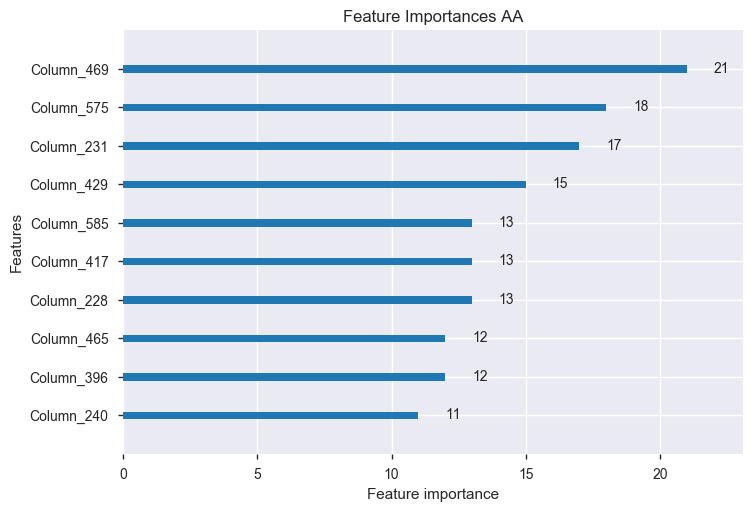

In [45]:
# feature importances
#print('Feature importances:', list(gbm_AA_tuned.feature_importances_))
plt.figure(figsize=(20, 10))
lgb.plot_importance(gbm_AA_tuned, max_num_features=10)
plt.title("Feature Importances AA")

## BB

In [46]:
%%time
lgb_bayes_tuner.fit(X_train_BB, y_train_BB, callback=status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0 
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0 
[CV] colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.00055688305634

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s


[CV]  colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0, score=-0.01695554800994879, total=   0.3s
[CV]  colsample_bytree=0.7056185425199154, learning_rate=0.01328322299832468, max_bin=439, max_depth=4, min_child_samples=25, min_child_weight=9, n_estimators=118, num_leaves=33, reg_alpha=2.0446039637226942e-05, reg_lambda=0.12973285423645403, scale_pos_weight=0.0005568830563403315, subsample=0.9824786804371506, subsample_freq=0, score=-0.013558021679577847, total=   0.3s
Model #1
Best MSE: -0.0238408
Best params: {'colsample_bytree': 0.7056185425199154, 'learning_rate': 0.01328322299832468, 'max_bin': 439, 'max_depth': 4, 'min_child_samples': 25, 'min_child_weight': 9, 'n_estimators': 118, 'num_leaves': 33, 'reg_alp

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV] colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1 
[CV]  colsample_bytree=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.6867218654755486, learning_rate=0.04668884070205238, max_bin=126, max_depth=6, min_child_samples=20, min_child_weight=7, n_estimators=113, num_leaves=43, reg_alpha=0.05212318854833209, reg_lambda=232.70061131141094, scale_pos_weight=33.390252422940854, subsample=0.6854858387960255, subsample_freq=1, score=-0.019764485045266317, total=   0.3s
Model #2
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


[CV] colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1 
[CV] colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1 
[CV] colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1 
[CV]  colsample_bytree=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV]  colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1, score=-0.012800001653789726, total=   0.6s
[CV]  colsample_bytree=0.832095022085215, learning_rate=0.010638933664917376, max_bin=793, max_depth=5, min_child_samples=22, min_child_weight=7, n_estimators=306, num_leaves=42, reg_alpha=0.6735797448070991, reg_lambda=8.03536063902359e-05, scale_pos_weight=336.9727672841232, subsample=0.7979703435590318, subsample_freq=1, score=-0.018125958892122054, total=   0.6s
Model #3
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV] colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8 
[CV]  c

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s


[CV]  colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8, score=-0.027103882303480892, total=   1.3s
[CV]  colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scale_pos_weight=0.08501657318323483, subsample=0.7737794325080181, subsample_freq=8, score=-0.013225946929518171, total=   1.1s
[CV]  colsample_bytree=0.7064056414363574, learning_rate=0.06654968297130963, max_bin=209, max_depth=6, min_child_samples=21, min_child_weight=9, n_estimators=398, num_leaves=67, reg_alpha=5.5514820852863855e-05, reg_lambda=0.059286062345985664, scal

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.1s finished


[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV] colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9 
[CV]  colsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9, score=-0.038926897383994144, total=   1.0s
[CV]  colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_weight=0.06790951520498989, subsample=0.7064878809066051, subsample_freq=9, score=-0.014624282545350913, total=   1.1s
[CV]  colsample_bytree=0.8789082806014207, learning_rate=0.05236293929735302, max_bin=123, max_depth=7, min_child_samples=24, min_child_weight=5, n_estimators=321, num_leaves=56, reg_alpha=0.07741769580886979, reg_lambda=1.773297359683411e-05, scale_pos_

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished


[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV] colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5 
[CV]  colsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5, score=-0.018300140884041194, total=   0.6s
[CV]  colsample_bytree=0.9678901384640584, learning_rate=0.07293190523422617, max_bin=638, max_depth=4, min_child_samples=31, min_child_weight=0, n_estimators=303, num_leaves=38, reg_alpha=0.00280652598578241, reg_lambda=0.0004004770358780221, scale_pos_weight=0.0770830560521126, subsample=0.8170145009983694, subsample_freq=5, score=-0.023521499176405985, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #6
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9 
[CV] colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s


[CV]  colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9, score=-0.013665976679630503, total=   2.0s
[CV]  colsample_bytree=0.6532207489216618, learning_rate=0.015611264415263513, max_bin=642, max_depth=6, min_child_samples=11, min_child_weight=8, n_estimators=269, num_leaves=52, reg_alpha=0.09773330291734499, reg_lambda=1.507457981065939e-09, scale_pos_weight=5.406121162360063, subsample=0.9760679706076199, subsample_freq=9, score=-0.018712775153169145, total=   1.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.3s finished


Model #7
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8 
[CV] colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8, score=-0.010760649041070493, total=   0.4s
[CV]  colsample_bytree=0.32298399845559495, learning_rate=0.30044074314959107, max_bin=843, max_depth=7, min_child_samples=32, min_child_weight=0, n_estimators=248, num_leaves=10, reg_alpha=1.525953142869282e-08, reg_lambda=0.007763155936932799, scale_pos_weight=17.341551141136463, subsample=0.5161361293463217, subsample_freq=8, score=-0.02070983637348442, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #8
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2 
[CV] colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s


[CV]  colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2, score=-0.014422539648380535, total=   0.8s
[CV]  colsample_bytree=0.4529497132993203, learning_rate=0.10891896379362535, max_bin=880, max_depth=8, min_child_samples=21, min_child_weight=5, n_estimators=200, num_leaves=92, reg_alpha=9.942280794488633e-07, reg_lambda=1.534293989010288e-05, scale_pos_weight=0.00021670389597082642, subsample=0.7998577783193466, subsample_freq=2, score=-0.020739545636587503, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.0s finished


Model #9
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3 
[CV] colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3, score=-0.015745339170350578, total=   0.5s
[CV]  colsample_bytree=0.1253129846023188, learning_rate=0.2222548678685647, max_bin=663, max_depth=8, min_child_samples=43, min_child_weight=4, n_estimators=320, num_leaves=93, reg_alpha=0.406599914723939, reg_lambda=0.10913229074462051, scale_pos_weight=2.7114000768609292e-06, subsample=0.8004976440929165, subsample_freq=3, score=-0.02605485892038117, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #10
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.42733372453245055, learning_rate=0.026674762250906058, max_bin=730, max_depth=9, min_child_samples=0, min_child_weight=9, n_estimators=135, num_leaves=100, reg_alpha=3.7134619013029595e-09, reg_lambda=5.414547809058644, scale_pos_weight=89.12701037816478, subsample=0.5586808519968258, subsample_freq=0 
[CV] colsample_bytree=0.42733372453245055, learning_rate=0.026674762250906058, max_bin=730, max_depth=9, min_child_samples=0, min_child_weight=9, n_estimators=135, num_leaves=100, reg_alpha=3.713461901302959

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s


[CV]  colsample_bytree=0.42733372453245055, learning_rate=0.026674762250906058, max_bin=730, max_depth=9, min_child_samples=0, min_child_weight=9, n_estimators=135, num_leaves=100, reg_alpha=3.7134619013029595e-09, reg_lambda=5.414547809058644, scale_pos_weight=89.12701037816478, subsample=0.5586808519968258, subsample_freq=0, score=-0.031222890057172905, total=   1.7s
[CV]  colsample_bytree=0.42733372453245055, learning_rate=0.026674762250906058, max_bin=730, max_depth=9, min_child_samples=0, min_child_weight=9, n_estimators=135, num_leaves=100, reg_alpha=3.7134619013029595e-09, reg_lambda=5.414547809058644, scale_pos_weight=89.12701037816478, subsample=0.5586808519968258, subsample_freq=0, score=-0.01427428806202707, total=   1.2s
[CV]  colsample_bytree=0.42733372453245055, learning_rate=0.026674762250906058, max_bin=730, max_depth=9, min_child_samples=0, min_child_weight=9, n_estimators=135, num_leaves=100, reg_alpha=3.7134619013029595e-09, reg_lambda=5.414547809058644, scale_pos_we

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.3s finished


Model #11
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.27377864911963296, learning_rate=0.8283272632029475, max_bin=115, max_depth=10, min_child_samples=42, min_child_weight=10, n_estimators=355, num_leaves=32, reg_alpha=3.812119057662291e-08, reg_lambda=1.0050971716532881e-09, scale_pos_weight=385.3966498451889, subsample=0.5752282591656716, subsample_freq=8 
[CV] colsample_bytree=0.27377864911963296, learning_rate=0.8283272632029475, max_bin=115, max_depth=10, min_child_samples=42, min_child_weight=10, n_estimators=355, num_leaves=32, reg_alpha=3.81211905766

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.27377864911963296, learning_rate=0.8283272632029475, max_bin=115, max_depth=10, min_child_samples=42, min_child_weight=10, n_estimators=355, num_leaves=32, reg_alpha=3.812119057662291e-08, reg_lambda=1.0050971716532881e-09, scale_pos_weight=385.3966498451889, subsample=0.5752282591656716, subsample_freq=8, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=0.27377864911963296, learning_rate=0.8283272632029475, max_bin=115, max_depth=10, min_child_samples=42, min_child_weight=10, n_estimators=355, num_leaves=32, reg_alpha=3.812119057662291e-08, reg_lambda=1.0050971716532881e-09, scale_pos_weight=385.3966498451889, subsample=0.5752282591656716, subsample_freq=8, score=-0.010760649041070493, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #12
Best MSE: -0.02326719
Best params: {'colsample_bytree': 0.6867218654755486, 'learning_rate': 0.04668884070205238, 'max_bin': 126, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 7, 'n_estimators': 113, 'num_leaves': 43, 'reg_alpha': 0.05212318854833209, 'reg_lambda': 232.70061131141094, 'scale_pos_weight': 33.390252422940854, 'subsample': 0.6854858387960255, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.3s


[CV]  colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.01826693533907623, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.0s finished


Model #13
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_sampl

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010757867919694507, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.0206825794501755, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #14
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.881137142692011, learning_rate=0.5805633328638741, max_bin=480, max_depth=7, min_child_samples=4, min_child_weight=10, n_estimators=148, num_leaves=54, reg_alpha=2.150680539816471e-09, reg_lambda=6.261655199839526e-08, scale_pos_weight=3.138161979141757e-06, subsample=0.5287366390477611, subsample_freq=4 
[CV] colsample_bytree=0.881137142692011, learning_rate=0.5805633328638741, max_bin=480, max_depth=7, min_child_samples=4, min_child_weight=10, n_estimators=148, num_leaves=54, reg_alpha=2.150680539816471e-09, reg_lambda=6.261655199839526e-08, scale_pos_weight=3.13816197914

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV]  colsample_bytree=0.881137142692011, learning_rate=0.5805633328638741, max_bin=480, max_depth=7, min_child_samples=4, min_child_weight=10, n_estimators=148, num_leaves=54, reg_alpha=2.150680539816471e-09, reg_lambda=6.261655199839526e-08, scale_pos_weight=3.138161979141757e-06, subsample=0.5287366390477611, subsample_freq=4, score=-0.05012775968172995, total=   1.2s
[CV]  colsample_bytree=0.881137142692011, learning_rate=0.5805633328638741, max_bin=480, max_depth=7, min_child_samples=4, min_child_weight=10, n_estimators=148, num_leaves=54, reg_alpha=2.150680539816471e-09, reg_lambda=6.261655199839526e-08, scale_pos_weight=3.138161979141757e-06, subsample=0.5287366390477611, subsample_freq=4, score=-0.04249507787591808, total=   0.8s
[CV]  colsample_bytree=0.881137142692011, learning_rate=0.5805633328638741, max_bin=480, max_depth=7, min_child_samples=4, min_child_weight=10, n_estimators=148, num_leaves=54, reg_alpha=2.150680539816471e-09, reg_lambda=6.261655199839526e-08, scale_po

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


Model #15
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_sampl

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #16
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.01075886067655006, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.02061010198043123, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #17
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9991629921501672, learning_rate=0.6776542130619561, max_bin=951, max_depth=5, min_child_samples=18, min_child_weight=7, n_estimators=122, num_leaves=14, reg_alpha=3.839333882008729e-07, reg_lambda=2.1923801676119523, scale_pos_weight=470.96498091955146, subsample=0.958640254705837, subsample_freq=9 
[CV] colsample_bytree=0.9991629921501672, learning_rate=0.6776542130619561, max_bin=951, max_depth=5, min_child_samples=18, min_child_weight=7, n_estimators=122, num_leaves=14, reg_alpha=3.839333882008729e-07, reg_lambda=2.1923801676119523, scale_pos_weight=470.96498091955146, s

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.9991629921501672, learning_rate=0.6776542130619561, max_bin=951, max_depth=5, min_child_samples=18, min_child_weight=7, n_estimators=122, num_leaves=14, reg_alpha=3.839333882008729e-07, reg_lambda=2.1923801676119523, scale_pos_weight=470.96498091955146, subsample=0.958640254705837, subsample_freq=9, score=-0.020677375964485736, total=   0.7s
[CV]  colsample_bytree=0.9991629921501672, learning_rate=0.6776542130619561, max_bin=951, max_depth=5, min_child_samples=18, min_child_weight=7, n_estimators=122, num_leaves=14, reg_alpha=3.839333882008729e-07, reg_lambda=2.1923801676119523, scale_pos_weight=470.96498091955146, subsample=0.958640254705837, subsample_freq=9, score=-0.01790797614373594, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #18
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.026262085146160685, total=   1.7s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.010671617044859786, total=   1.8s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.018310072771887866, total=   1.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.4s finished


Model #19
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, 

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.02060911663887863, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #20
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.01075886067655006, total=   0.4s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10, score=-0.02061010198043123, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #21
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6022205636205973, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.6022205636205973, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.6022205636205973, learning_rate=0.01, ma

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #22
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=25, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=0.031494359994549505, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=25, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=0.031494359994549505, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #23
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.13047527037075293, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=0.13047527037075293, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_sa

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #24
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=21, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=21, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=21, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.01074149480898511, total=   0.2s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=21, min_child_weight=10, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.020673261274328242, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #25
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=0.0809889489741022, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=0.0809889489741022, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=0, m

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=0.0809889489741022, subsample=1.0, subsample_freq=10, score=-0.030915013102573292, total=   1.4s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=0.0809889489741022, subsample=1.0, subsample_freq=10, score=-0.01074033785825826, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.7s finished


Model #26
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.08361877682808987, learning_rate=0.8064096162938992, max_bin=354, max_depth=4, min_child_samples=47, min_child_weight=1, n_estimators=122, num_leaves=79, reg_alpha=0.06489608435082099, reg_lambda=5.618328480822215e-06, scale_pos_weight=88.57589236650023, subsample=0.6912520869957561, subsample_freq=2 
[CV] colsample_bytree=0.08361877682808987, learning_rate=0.8064096162938992, max_bin=354, max_depth=4, min_child_samples=47, min_child_weight=1, n_estimators=122, num_leaves=79, reg_alpha=0.06489608435082099, reg_lambda=5.618328480822215e-06, scale_pos_weight=88.57589236650023

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.08361877682808987, learning_rate=0.8064096162938992, max_bin=354, max_depth=4, min_child_samples=47, min_child_weight=1, n_estimators=122, num_leaves=79, reg_alpha=0.06489608435082099, reg_lambda=5.618328480822215e-06, scale_pos_weight=88.57589236650023, subsample=0.6912520869957561, subsample_freq=2, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #27
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.32200586455121727, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=2.580560123443388, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.32200586455121727, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=2.580560123443388, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.32200586455121727, learning_rate=0.01, max

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.32200586455121727, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=2.580560123443388, subsample=1.0, subsample_freq=0, score=-0.010961625665007293, total=   0.4s
[CV]  colsample_bytree=0.32200586455121727, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=2.580560123443388, subsample=1.0, subsample_freq=0, score=-0.020386146305320894, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #28
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.017436784897985752, learning_rate=0.013319596053391851, max_bin=836, max_depth=10, min_child_samples=14, min_child_weight=9, n_estimators=174, num_leaves=27, reg_alpha=0.08413962049248021, reg_lambda=4.068989020041772e-06, scale_pos_weight=1.7100988131285563e-06, subsample=0.5989597405430409, subsample_freq=5 
[CV] colsample_bytree=0.017436784897985752, learning_rate=0.013319596053391851, max_bin=836, max_depth=10, min_child_samples=14, min_child_weight=9, n_estimators=174, num_leaves=27, reg_alpha=0.08413962049248021, reg_lambda=4.068989020041772e-06, scale_pos_weight=1.71

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.017436784897985752, learning_rate=0.013319596053391851, max_bin=836, max_depth=10, min_child_samples=14, min_child_weight=9, n_estimators=174, num_leaves=27, reg_alpha=0.08413962049248021, reg_lambda=4.068989020041772e-06, scale_pos_weight=1.7100988131285563e-06, subsample=0.5989597405430409, subsample_freq=5, score=-0.029549229626398454, total=   0.7s
[CV]  colsample_bytree=0.017436784897985752, learning_rate=0.013319596053391851, max_bin=836, max_depth=10, min_child_samples=14, min_child_weight=9, n_estimators=174, num_leaves=27, reg_alpha=0.08413962049248021, reg_lambda=4.068989020041772e-06, scale_pos_weight=1.7100988131285563e-06, subsample=0.5989597405430409, subsample_freq=5, score=-0.029461139311876446, total=   0.7s
[CV]  colsample_bytree=0.017436784897985752, learning_rate=0.013319596053391851, max_bin=836, max_depth=10, min_child_samples=14, min_child_weight=9, n_estimators=174, num_leaves=27, reg_alpha=0.08413962049248021, reg_lambda=4.0689890200417

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #29
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.012249149013575576, learning_rate=0.0892839505522448, max_bin=960, max_depth=3, min_child_samples=46, min_child_weight=6, n_estimators=317, num_leaves=13, reg_alpha=0.38571854059516375, reg_lambda=4.304881499189205e-06, scale_pos_weight=19.537808951195878, subsample=0.9565786220830431, subsample_freq=10 
[CV] colsample_bytree=0.012249149013575576, learning_rate=0.0892839505522448, max_bin=960, max_depth=3, min_child_samples=46, min_child_weight=6, n_estimators=317, num_leaves=13, reg_alpha=0.38571854059516375, reg_lambda=4.304881499189205e-06, scale_pos_weight=19.5378089511

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s


[CV]  colsample_bytree=0.012249149013575576, learning_rate=0.0892839505522448, max_bin=960, max_depth=3, min_child_samples=46, min_child_weight=6, n_estimators=317, num_leaves=13, reg_alpha=0.38571854059516375, reg_lambda=4.304881499189205e-06, scale_pos_weight=19.537808951195878, subsample=0.9565786220830431, subsample_freq=10, score=-0.012728413183459143, total=   0.4s
[CV]  colsample_bytree=0.012249149013575576, learning_rate=0.0892839505522448, max_bin=960, max_depth=3, min_child_samples=46, min_child_weight=6, n_estimators=317, num_leaves=13, reg_alpha=0.38571854059516375, reg_lambda=4.304881499189205e-06, scale_pos_weight=19.537808951195878, subsample=0.9565786220830431, subsample_freq=10, score=-0.018777576734414714, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #30
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.899890503805836, learning_rate=0.010169820153202764, max_bin=203, max_depth=4, min_child_samples=27, min_child_weight=4, n_estimators=221, num_leaves=49, reg_alpha=2.551551163820393e-07, reg_lambda=2.880568643595804e-08, scale_pos_weight=1.178135827023759e-06, subsample=0.5303334948259562, subsample_freq=4 
[CV] colsample_bytree=0.899890503805836, learning_rate=0.010169820153202764, max_bin=203, max_depth=4, min_child_samples=27, min_child_weight=4, n_estimators=221, num_leaves=49, reg_alpha=2.551551163820393e-07, reg_lambda=2.880568643595804e-08, scale_pos_weight=1.1781358

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s


[CV]  colsample_bytree=0.899890503805836, learning_rate=0.010169820153202764, max_bin=203, max_depth=4, min_child_samples=27, min_child_weight=4, n_estimators=221, num_leaves=49, reg_alpha=2.551551163820393e-07, reg_lambda=2.880568643595804e-08, scale_pos_weight=1.178135827023759e-06, subsample=0.5303334948259562, subsample_freq=4, score=-0.019054352051737444, total=   0.3s
[CV]  colsample_bytree=0.899890503805836, learning_rate=0.010169820153202764, max_bin=203, max_depth=4, min_child_samples=27, min_child_weight=4, n_estimators=221, num_leaves=49, reg_alpha=2.551551163820393e-07, reg_lambda=2.880568643595804e-08, scale_pos_weight=1.178135827023759e-06, subsample=0.5303334948259562, subsample_freq=4, score=-0.011118331126921137, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #31
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.011179839006853843, learning_rate=0.011475190346234114, max_bin=248, max_depth=4, min_child_samples=44, min_child_weight=2, n_estimators=187, num_leaves=84, reg_alpha=0.023624036928504174, reg_lambda=0.7163010809270152, scale_pos_weight=1.2469050725530918e-06, subsample=0.5136592973989351, subsample_freq=9 
[CV] colsample_bytree=0.011179839006853843, learning_rate=0.011475190346234114, max_bin=248, max_depth=4, min_child_samples=44, min_child_weight=2, n_estimators=187, num_leaves=84, reg_alpha=0.023624036928504174, reg_lambda=0.7163010809270152, scale_pos_weight=1.24690507

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.011179839006853843, learning_rate=0.011475190346234114, max_bin=248, max_depth=4, min_child_samples=44, min_child_weight=2, n_estimators=187, num_leaves=84, reg_alpha=0.023624036928504174, reg_lambda=0.7163010809270152, scale_pos_weight=1.2469050725530918e-06, subsample=0.5136592973989351, subsample_freq=9, score=-0.010760649041070493, total=   0.2s
[CV]  colsample_bytree=0.011179839006853843, learning_rate=0.011475190346234114, max_bin=248, max_depth=4, min_child_samples=44, min_child_weight=2, n_estimators=187, num_leaves=84, reg_alpha=0.023624036928504174, reg_lambda=0.7163010809270152, scale_pos_weight=1.2469050725530918e-06, subsample=0.5136592973989351, subsample_freq=9, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #32
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.13279524321356992, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.13279524321356992, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.13279524321356992, m

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.4s


[CV]  colsample_bytree=0.01, learning_rate=0.13279524321356992, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.024704544589286063, total=   4.6s
[CV]  colsample_bytree=0.01, learning_rate=0.13279524321356992, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.012604826550170065, total=   2.4s
[CV]  colsample_bytree=0.01, learning_rate=0.13279524321356992, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.01881359137246645, total=   1.0s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.3s finished


Model #33
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.015182316998015612, learning_rate=0.010811184040146318, max_bin=560, max_depth=10, min_child_samples=35, min_child_weight=10, n_estimators=120, num_leaves=33, reg_alpha=1.6840997599974967e-05, reg_lambda=299.0582351148346, scale_pos_weight=339.4665995094163, subsample=0.7988787248271574, subsample_freq=9 
[CV] colsample_bytree=0.015182316998015612, learning_rate=0.010811184040146318, max_bin=560, max_depth=10, min_child_samples=35, min_child_weight=10, n_estimators=120, num_leaves=33, reg_alpha=1.6840997599974967e-05, reg_lambda=299.0582351148346, scale_pos_weight=339.46659

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #34
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_est

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0, score=-0.010725378772373152, total=   1.5s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=0.5, subsample_freq=0, score=-0.02047939981902031, total=   1.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.3s finished


Model #35
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #36
Best MSE: -0.02262956
Best params: {'colsample_bytree': 0.01, 'learning_rate': 1.0, 'max_bin': 1000, 'max_depth': 10, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1000.0, 'scale_pos_weight': 499.99999999999994, 'subsample': 1.0, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.07236399834882884, learning_rate=0.010526794242252552, max_bin=952, max_depth=10, min_child_samples=3, min_child_weight=2, n_estimators=137, num_leaves=90, reg_alpha=0.05235909549706197, reg_lambda=0.00039944085548349094, scale_pos_weight=68.62395735633058, subsample=0.5610157286354842, subsample_freq=1 
[CV] colsample_bytree=0.07236399834882884, learning_rate=0.010526794242252552, max_bin=952, max_depth=10, min_child_samples=3, min_child_weight=2, n_estimators=137, num_leaves=90, reg_alpha=0.05235909549706197, reg_lambda=0.00039944085548349094, scale_pos_weight=68.62395735

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.4s


[CV]  colsample_bytree=0.07236399834882884, learning_rate=0.010526794242252552, max_bin=952, max_depth=10, min_child_samples=3, min_child_weight=2, n_estimators=137, num_leaves=90, reg_alpha=0.05235909549706197, reg_lambda=0.00039944085548349094, scale_pos_weight=68.62395735633058, subsample=0.5610157286354842, subsample_freq=1, score=-0.02907262703988927, total=   1.5s
[CV]  colsample_bytree=0.07236399834882884, learning_rate=0.010526794242252552, max_bin=952, max_depth=10, min_child_samples=3, min_child_weight=2, n_estimators=137, num_leaves=90, reg_alpha=0.05235909549706197, reg_lambda=0.00039944085548349094, scale_pos_weight=68.62395735633058, subsample=0.5610157286354842, subsample_freq=1, score=-0.010400487926335045, total=   1.3s
[CV]  colsample_bytree=0.07236399834882884, learning_rate=0.010526794242252552, max_bin=952, max_depth=10, min_child_samples=3, min_child_weight=2, n_estimators=137, num_leaves=90, reg_alpha=0.05235909549706197, reg_lambda=0.00039944085548349094, scale_

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.9s finished


Model #37
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8431785048841973, learning_rate=0.010425341059755462, max_bin=982, max_depth=10, min_child_samples=9, min_child_weight=0, n_estimators=126, num_leaves=27, reg_alpha=0.0021916615532333195, reg_lambda=0.04953231124791563, scale_pos_weight=2.06695680482764e-06, subsample=0.8069052773115618, subsample_freq=9 
[CV] colsample_bytree=0.8431785048841973, learning_rate=0.010425341059755462, max_bin=982, max_depth=10, min_child_samples=9, min_child_weight=0, n_estimators=126, num_leaves=27, reg_alpha=0.00219166

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s


[CV]  colsample_bytree=0.8431785048841973, learning_rate=0.010425341059755462, max_bin=982, max_depth=10, min_child_samples=9, min_child_weight=0, n_estimators=126, num_leaves=27, reg_alpha=0.0021916615532333195, reg_lambda=0.04953231124791563, scale_pos_weight=2.06695680482764e-06, subsample=0.8069052773115618, subsample_freq=9, score=-0.01380928027338274, total=   0.8s
[CV]  colsample_bytree=0.8431785048841973, learning_rate=0.010425341059755462, max_bin=982, max_depth=10, min_child_samples=9, min_child_weight=0, n_estimators=126, num_leaves=27, reg_alpha=0.0021916615532333195, reg_lambda=0.04953231124791563, scale_pos_weight=2.06695680482764e-06, subsample=0.8069052773115618, subsample_freq=9, score=-0.018648361826776903, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.8s finished


Model #38
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.03090748062867056, learning_rate=0.9167167780952415, max_bin=201, max_depth=6, min_child_samples=2, min_child_weight=6, n_estimators=166, num_leaves=73, reg_alpha=1.2289755437714628e-09, reg_lambda=2.9539610784454775e-08, scale_pos_weight=208.89686336045514, subsample=0.9440281369607628, subsample_freq=4 
[CV] colsample_bytree=0.03090748062867056, learning_rate=0.9167167780952415, max_bin=201, max_depth=6, min_child_samples=2, min_child_weight=6, n_estimators=166, num_leaves=73, reg_alpha=1.2289755437

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.3s


[CV]  colsample_bytree=0.03090748062867056, learning_rate=0.9167167780952415, max_bin=201, max_depth=6, min_child_samples=2, min_child_weight=6, n_estimators=166, num_leaves=73, reg_alpha=1.2289755437714628e-09, reg_lambda=2.9539610784454775e-08, scale_pos_weight=208.89686336045514, subsample=0.9440281369607628, subsample_freq=4, score=-0.03189669789965393, total=   0.6s
[CV]  colsample_bytree=0.03090748062867056, learning_rate=0.9167167780952415, max_bin=201, max_depth=6, min_child_samples=2, min_child_weight=6, n_estimators=166, num_leaves=73, reg_alpha=1.2289755437714628e-09, reg_lambda=2.9539610784454775e-08, scale_pos_weight=208.89686336045514, subsample=0.9440281369607628, subsample_freq=4, score=-0.032440826055962525, total=   0.8s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.3s finished


Model #39
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.028368084276290558, total=   0.7s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.01075886067655006, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #40
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #41
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9329595235799277, learning_rate=0.01057264172029315, max_bin=369, max_depth=7, min_child_samples=32, min_child_weight=10, n_estimators=352, num_leaves=67, reg_alpha=0.27114603505118884, reg_lambda=3.2174253608039782, scale_pos_weight=346.9317002725566, subsample=0.5180336714518043, subsample_freq=10 
[CV] colsample_bytree=0.9329595235799277, learning_rate=0.01057264172029315, max_bin=369, max_depth=7, min_child_samples=32, min_child_weight=10, n_estimators=352, num_leaves=67, reg_alpha=0.2711460350511

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.9329595235799277, learning_rate=0.01057264172029315, max_bin=369, max_depth=7, min_child_samples=32, min_child_weight=10, n_estimators=352, num_leaves=67, reg_alpha=0.27114603505118884, reg_lambda=3.2174253608039782, scale_pos_weight=346.9317002725566, subsample=0.5180336714518043, subsample_freq=10, score=-0.010760649041070493, total=   0.4s
[CV]  colsample_bytree=0.9329595235799277, learning_rate=0.01057264172029315, max_bin=369, max_depth=7, min_child_samples=32, min_child_weight=10, n_estimators=352, num_leaves=67, reg_alpha=0.27114603505118884, reg_lambda=3.2174253608039782, scale_pos_weight=346.9317002725566, subsample=0.5180336714518043, subsample_freq=10, score=-0.02070983637348442, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #42
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9746552443260853, learning_rate=0.01177713809645953, max_bin=745, max_depth=10, min_child_samples=48, min_child_weight=0, n_estimators=362, num_leaves=28, reg_alpha=2.250037164012936e-07, reg_lambda=2.105130634835373e-08, scale_pos_weight=342.56751277709157, subsample=0.8264695881926329, subsample_freq=1 
[CV] colsample_bytree=0.9746552443260853, learning_rate=0.01177713809645953, max_bin=745, max_depth=10, min_child_samples=48, min_child_weight=0, n_estimators=362, num_leaves=28, reg_alpha=2.25003716

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s


[CV]  colsample_bytree=0.9746552443260853, learning_rate=0.01177713809645953, max_bin=745, max_depth=10, min_child_samples=48, min_child_weight=0, n_estimators=362, num_leaves=28, reg_alpha=2.250037164012936e-07, reg_lambda=2.105130634835373e-08, scale_pos_weight=342.56751277709157, subsample=0.8264695881926329, subsample_freq=1, score=-0.010760649041070493, total=   0.2s
[CV]  colsample_bytree=0.9746552443260853, learning_rate=0.01177713809645953, max_bin=745, max_depth=10, min_child_samples=48, min_child_weight=0, n_estimators=362, num_leaves=28, reg_alpha=2.250037164012936e-07, reg_lambda=2.105130634835373e-08, scale_pos_weight=342.56751277709157, subsample=0.8264695881926329, subsample_freq=1, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #43
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.04285152265886617, learning_rate=0.01147627287030582, max_bin=939, max_depth=4, min_child_samples=44, min_child_weight=5, n_estimators=365, num_leaves=77, reg_alpha=1.1115362276665184e-09, reg_lambda=87.17782044549826, scale_pos_weight=2.5195515392504775e-05, subsample=0.6768509442503128, subsample_freq=5 
[CV] colsample_bytree=0.04285152265886617, learning_rate=0.01147627287030582, max_bin=939, max_depth=4, min_child_samples=44, min_child_weight=5, n_estimators=365, num_leaves=77, reg_alpha=1.1115362

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.04285152265886617, learning_rate=0.01147627287030582, max_bin=939, max_depth=4, min_child_samples=44, min_child_weight=5, n_estimators=365, num_leaves=77, reg_alpha=1.1115362276665184e-09, reg_lambda=87.17782044549826, scale_pos_weight=2.5195515392504775e-05, subsample=0.6768509442503128, subsample_freq=5, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #44
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #45
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.3354982552964088, learning_rate=0.2443402555413347, max_bin=186, max_depth=6, min_child_samples=50, min_child_weight=6, n_estimators=212, num_leaves=96, reg_alpha=1.1344275404346104e-09, reg_lambda=486.75697093683783, scale_pos_weight=376.58888673111625, subsample=0.682776402122271, subsample_freq=1 
[CV] colsample_bytree=0.3354982552964088, learning_rate=0.2443402555413347, max_bin=186, max_depth=6, min_child_samples=50, min_child_weight=6, n_estimators=212, num_leaves=96, reg_alpha=1.134427540434610

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #46
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6860746833722932, learning_rate=0.01033899142922918, max_bin=567, max_depth=10, min_child_samples=48, min_child_weight=2, n_estimators=398, num_leaves=59, reg_alpha=0.20113858076724947, reg_lambda=244.53951071643982, scale_pos_weight=1.0973699830912657e-05, subsample=0.5946330897761017, subsample_freq=3 
[CV] colsample_bytree=0.6860746833722932, learning_rate=0.01033899142922918, max_bin=567, max_depth=10, min_child_samples=48, min_child_weight=2, n_estimators=398, num_leaves=59, reg_alpha=0.201138580

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.6860746833722932, learning_rate=0.01033899142922918, max_bin=567, max_depth=10, min_child_samples=48, min_child_weight=2, n_estimators=398, num_leaves=59, reg_alpha=0.20113858076724947, reg_lambda=244.53951071643982, scale_pos_weight=1.0973699830912657e-05, subsample=0.5946330897761017, subsample_freq=3, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=0.6860746833722932, learning_rate=0.01033899142922918, max_bin=567, max_depth=10, min_child_samples=48, min_child_weight=2, n_estimators=398, num_leaves=59, reg_alpha=0.20113858076724947, reg_lambda=244.53951071643982, scale_pos_weight=1.0973699830912657e-05, subsample=0.5946330897761017, subsample_freq=3, score=-0.010760649041070493, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #47
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.057659298893193385, learning_rate=0.15330275490079545, max_bin=903, max_depth=10, min_child_samples=50, min_child_weight=8, n_estimators=297, num_leaves=21, reg_alpha=3.0434727327909533e-05, reg_lambda=6.644951486614933e-07, scale_pos_weight=122.28236119106161, subsample=0.6197723312777913, subsample_freq=6 
[CV] colsample_bytree=0.057659298893193385, learning_rate=0.15330275490079545, max_bin=903, max_depth=10, min_child_samples=50, min_child_weight=8, n_estimators=297, num_leaves=21, reg_alpha=3.043

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s


[CV]  colsample_bytree=0.057659298893193385, learning_rate=0.15330275490079545, max_bin=903, max_depth=10, min_child_samples=50, min_child_weight=8, n_estimators=297, num_leaves=21, reg_alpha=3.0434727327909533e-05, reg_lambda=6.644951486614933e-07, scale_pos_weight=122.28236119106161, subsample=0.6197723312777913, subsample_freq=6, score=-0.010760649041070493, total=   0.2s
[CV]  colsample_bytree=0.057659298893193385, learning_rate=0.15330275490079545, max_bin=903, max_depth=10, min_child_samples=50, min_child_weight=8, n_estimators=297, num_leaves=21, reg_alpha=3.0434727327909533e-05, reg_lambda=6.644951486614933e-07, scale_pos_weight=122.28236119106161, subsample=0.6197723312777913, subsample_freq=6, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #48
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9919181704774941, learning_rate=0.7241121931631204, max_bin=795, max_depth=6, min_child_samples=48, min_child_weight=10, n_estimators=399, num_leaves=94, reg_alpha=1.3487186316732455e-09, reg_lambda=0.0009813236172397084, scale_pos_weight=172.33518864184427, subsample=0.987705236822302, subsample_freq=1 
[CV] colsample_bytree=0.9919181704774941, learning_rate=0.7241121931631204, max_bin=795, max_depth=6, min_child_samples=48, min_child_weight=10, n_estimators=399, num_leaves=94, reg_alpha=1.3487186316

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s


[CV]  colsample_bytree=0.9919181704774941, learning_rate=0.7241121931631204, max_bin=795, max_depth=6, min_child_samples=48, min_child_weight=10, n_estimators=399, num_leaves=94, reg_alpha=1.3487186316732455e-09, reg_lambda=0.0009813236172397084, scale_pos_weight=172.33518864184427, subsample=0.987705236822302, subsample_freq=1, score=-0.03551834885819973, total=   0.4s
[CV]  colsample_bytree=0.9919181704774941, learning_rate=0.7241121931631204, max_bin=795, max_depth=6, min_child_samples=48, min_child_weight=10, n_estimators=399, num_leaves=94, reg_alpha=1.3487186316732455e-09, reg_lambda=0.0009813236172397084, scale_pos_weight=172.33518864184427, subsample=0.987705236822302, subsample_freq=1, score=-0.028683510287885818, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Model #49
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.41633579472080723, learning_rate=0.01020240601117476, max_bin=129, max_depth=10, min_child_samples=27, min_child_weight=7, n_estimators=273, num_leaves=25, reg_alpha=1.859481822493778e-07, reg_lambda=0.6927737753490082, scale_pos_weight=153.38687761989024, subsample=0.5789494156453137, subsample_freq=9 
[CV] colsample_bytree=0.41633579472080723, learning_rate=0.01020240601117476, max_bin=129, max_depth=10, min_child_samples=27, min_child_weight=7, n_estimators=273, num_leaves=25, reg_alpha=1.859481822

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.41633579472080723, learning_rate=0.01020240601117476, max_bin=129, max_depth=10, min_child_samples=27, min_child_weight=7, n_estimators=273, num_leaves=25, reg_alpha=1.859481822493778e-07, reg_lambda=0.6927737753490082, scale_pos_weight=153.38687761989024, subsample=0.5789494156453137, subsample_freq=9, score=-0.017986993778275225, total=   0.3s
[CV]  colsample_bytree=0.41633579472080723, learning_rate=0.01020240601117476, max_bin=129, max_depth=10, min_child_samples=27, min_child_weight=7, n_estimators=273, num_leaves=25, reg_alpha=1.859481822493778e-07, reg_lambda=0.6927737753490082, scale_pos_weight=153.38687761989024, subsample=0.5789494156453137, subsample_freq=9, score=-0.01208111845282118, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #50
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #51
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.02210980171003745, learning_rate=0.013522445968276713, max_bin=104, max_depth=8, min_child_samples=9, min_child_weight=9, n_estimators=115, num_leaves=27, reg_alpha=2.380844592475192e-09, reg_lambda=3.246552186596616e-09, scale_pos_weight=1.6897115724408639e-06, subsample=0.8887081927312213, subsample_freq=8 
[CV] colsample_bytree=0.02210980171003745, learning_rate=0.013522445968276713, max_bin=104, max_depth=8, min_child_samples=9, min_child_weight=9, n_estimators=115, num_leaves=27, reg_alpha=2.3808

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.02210980171003745, learning_rate=0.013522445968276713, max_bin=104, max_depth=8, min_child_samples=9, min_child_weight=9, n_estimators=115, num_leaves=27, reg_alpha=2.380844592475192e-09, reg_lambda=3.246552186596616e-09, scale_pos_weight=1.6897115724408639e-06, subsample=0.8887081927312213, subsample_freq=8, score=-0.018308495975949288, total=   0.3s
[CV]  colsample_bytree=0.02210980171003745, learning_rate=0.013522445968276713, max_bin=104, max_depth=8, min_child_samples=9, min_child_weight=9, n_estimators=115, num_leaves=27, reg_alpha=2.380844592475192e-09, reg_lambda=3.246552186596616e-09, scale_pos_weight=1.6897115724408639e-06, subsample=0.8887081927312213, subsample_freq=8, score=-0.010296112361422985, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Model #52
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.11821683545683852, learning_rate=0.12310563493657507, max_bin=111, max_depth=8, min_child_samples=1, min_child_weight=9, n_estimators=172, num_leaves=21, reg_alpha=2.5413173516391016e-05, reg_lambda=570.0170157109604, scale_pos_weight=52.16307576966404, subsample=0.5827169121925342, subsample_freq=8 
[CV] colsample_bytree=0.11821683545683852, learning_rate=0.12310563493657507, max_bin=111, max_depth=8, min_child_samples=1, min_child_weight=9, n_estimators=172, num_leaves=21, reg_alpha=2.54131735163910

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.11821683545683852, learning_rate=0.12310563493657507, max_bin=111, max_depth=8, min_child_samples=1, min_child_weight=9, n_estimators=172, num_leaves=21, reg_alpha=2.5413173516391016e-05, reg_lambda=570.0170157109604, scale_pos_weight=52.16307576966404, subsample=0.5827169121925342, subsample_freq=8, score=-0.019162738066841368, total=   0.4s
[CV]  colsample_bytree=0.11821683545683852, learning_rate=0.12310563493657507, max_bin=111, max_depth=8, min_child_samples=1, min_child_weight=9, n_estimators=172, num_leaves=21, reg_alpha=2.5413173516391016e-05, reg_lambda=570.0170157109604, scale_pos_weight=52.16307576966404, subsample=0.5827169121925342, subsample_freq=8, score=-0.010508057650737078, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #53
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #54
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.28281127270877865, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.28281127270877865, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_f

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.28281127270877865, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s
[CV]  colsample_bytree=0.28281127270877865, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #55
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.12305446060847118, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.12305446060847118, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #56
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.10491801278000219, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.10491801278000219, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #57
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.4263688955500267, learning_rate=0.01007229970313639, max_bin=955, max_depth=5, min_child_samples=8, min_child_weight=0, n_estimators=135, num_leaves=72, reg_alpha=1.0216392728263877e-09, reg_lambda=0.04102236727793756, scale_pos_weight=325.10728026040886, subsample=0.715684153288018, subsample_freq=1 
[CV] colsample_bytree=0.4263688955500267, learning_rate=0.01007229970313639, max_bin=955, max_depth=5, min_child_samples=8, min_child_weight=0, n_estimators=135, num_leaves=72, reg_alpha=1.02163927282638

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV]  colsample_bytree=0.4263688955500267, learning_rate=0.01007229970313639, max_bin=955, max_depth=5, min_child_samples=8, min_child_weight=0, n_estimators=135, num_leaves=72, reg_alpha=1.0216392728263877e-09, reg_lambda=0.04102236727793756, scale_pos_weight=325.10728026040886, subsample=0.715684153288018, subsample_freq=1, score=-0.012506535173805124, total=   0.5s
[CV]  colsample_bytree=0.4263688955500267, learning_rate=0.01007229970313639, max_bin=955, max_depth=5, min_child_samples=8, min_child_weight=0, n_estimators=135, num_leaves=72, reg_alpha=1.0216392728263877e-09, reg_lambda=0.04102236727793756, scale_pos_weight=325.10728026040886, subsample=0.715684153288018, subsample_freq=1, score=-0.017439855624051745, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #58
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s


[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=1.0, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #59
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5137004885496311, learning_rate=0.015479995254608279, max_bin=952, max_depth=6, min_child_samples=4, min_child_weight=2, n_estimators=396, num_leaves=19, reg_alpha=6.673364692524263e-09, reg_lambda=268.7020923997435, scale_pos_weight=153.14866253290026, subsample=0.9448045317172122, subsample_freq=9 
[CV] colsample_bytree=0.5137004885496311, learning_rate=0.015479995254608279, max_bin=952, max_depth=6, min_child_samples=4, min_child_weight=2, n_estimators=396, num_leaves=19, reg_alpha=6.67336469252426

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s


[CV]  colsample_bytree=0.5137004885496311, learning_rate=0.015479995254608279, max_bin=952, max_depth=6, min_child_samples=4, min_child_weight=2, n_estimators=396, num_leaves=19, reg_alpha=6.673364692524263e-09, reg_lambda=268.7020923997435, scale_pos_weight=153.14866253290026, subsample=0.9448045317172122, subsample_freq=9, score=-0.011061201063675917, total=   1.9s
[CV]  colsample_bytree=0.5137004885496311, learning_rate=0.015479995254608279, max_bin=952, max_depth=6, min_child_samples=4, min_child_weight=2, n_estimators=396, num_leaves=19, reg_alpha=6.673364692524263e-09, reg_lambda=268.7020923997435, scale_pos_weight=153.14866253290026, subsample=0.9448045317172122, subsample_freq=9, score=-0.018733897609128757, total=   1.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.6s finished


Model #60
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.07093112505780637, learning_rate=0.6885566895671288, max_bin=611, max_depth=6, min_child_samples=50, min_child_weight=7, n_estimators=346, num_leaves=96, reg_alpha=7.46613624257462e-09, reg_lambda=167.00659194275963, scale_pos_weight=2.252612817844075e-06, subsample=0.5410371524925641, subsample_freq=9 
[CV] colsample_bytree=0.07093112505780637, learning_rate=0.6885566895671288, max_bin=611, max_depth=6, min_child_samples=50, min_child_weight=7, n_estimators=346, num_leaves=96, reg_alpha=7.46613624257

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.07093112505780637, learning_rate=0.6885566895671288, max_bin=611, max_depth=6, min_child_samples=50, min_child_weight=7, n_estimators=346, num_leaves=96, reg_alpha=7.46613624257462e-09, reg_lambda=167.00659194275963, scale_pos_weight=2.252612817844075e-06, subsample=0.5410371524925641, subsample_freq=9, score=-0.010760649041070493, total=   0.3s
[CV]  colsample_bytree=0.07093112505780637, learning_rate=0.6885566895671288, max_bin=611, max_depth=6, min_child_samples=50, min_child_weight=7, n_estimators=346, num_leaves=96, reg_alpha=7.46613624257462e-09, reg_lambda=167.00659194275963, scale_pos_weight=2.252612817844075e-06, subsample=0.5410371524925641, subsample_freq=9, score=-0.02070983637348442, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #61
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #62
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9821034081940361, learning_rate=0.010742999632031259, max_bin=434, max_depth=5, min_child_samples=1, min_child_weight=6, n_estimators=132, num_leaves=16, reg_alpha=0.0004963645570976459, reg_lambda=302.1447858777735, scale_pos_weight=0.008534598061720836, subsample=0.5515937441938913, subsample_freq=4 
[CV] colsample_bytree=0.9821034081940361, learning_rate=0.010742999632031259, max_bin=434, max_depth=5, min_child_samples=1, min_child_weight=6, n_estimators=132, num_leaves=16, reg_alpha=0.000496364557

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s


[CV]  colsample_bytree=0.9821034081940361, learning_rate=0.010742999632031259, max_bin=434, max_depth=5, min_child_samples=1, min_child_weight=6, n_estimators=132, num_leaves=16, reg_alpha=0.0004963645570976459, reg_lambda=302.1447858777735, scale_pos_weight=0.008534598061720836, subsample=0.5515937441938913, subsample_freq=4, score=-0.010685349860360389, total=   0.5s
[CV]  colsample_bytree=0.9821034081940361, learning_rate=0.010742999632031259, max_bin=434, max_depth=5, min_child_samples=1, min_child_weight=6, n_estimators=132, num_leaves=16, reg_alpha=0.0004963645570976459, reg_lambda=302.1447858777735, scale_pos_weight=0.008534598061720836, subsample=0.5515937441938913, subsample_freq=4, score=-0.020386777877694946, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Model #63
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.11137992397732757, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.11137992397732757, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, s

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.01, learning_rate=0.11137992397732757, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.11137992397732757, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #64
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.4960634671498175, learning_rate=0.010284216062891783, max_bin=573, max_depth=4, min_child_samples=37, min_child_weight=0, n_estimators=383, num_leaves=70, reg_alpha=0.00010358767895073967, reg_lambda=1.307343360003588e-09, scale_pos_weight=2.8138073434087747e-05, subsample=0.5079554778298633, subsample_freq=10 
[CV] colsample_bytree=0.4960634671498175, learning_rate=0.010284216062891783, max_bin=573, max_depth=4, min_child_samples=37, min_child_weight=0, n_estimators=383, num_leaves=70, reg_alpha=0.00

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.4960634671498175, learning_rate=0.010284216062891783, max_bin=573, max_depth=4, min_child_samples=37, min_child_weight=0, n_estimators=383, num_leaves=70, reg_alpha=0.00010358767895073967, reg_lambda=1.307343360003588e-09, scale_pos_weight=2.8138073434087747e-05, subsample=0.5079554778298633, subsample_freq=10, score=-0.02842309086748135, total=   0.6s
[CV]  colsample_bytree=0.4960634671498175, learning_rate=0.010284216062891783, max_bin=573, max_depth=4, min_child_samples=37, min_child_weight=0, n_estimators=383, num_leaves=70, reg_alpha=0.00010358767895073967, reg_lambda=1.307343360003588e-09, scale_pos_weight=2.8138073434087747e-05, subsample=0.5079554778298633, subsample_freq=10, score=-0.026704469371437983, total=   0.6s
[CV]  colsample_bytree=0.4960634671498175, learning_rate=0.010284216062891783, max_bin=573, max_depth=4, min_child_samples=37, min_child_weight=0, n_estimators=383, num_leaves=70, reg_alpha=0.00010358767895073967, reg_lambda=1.307343360003

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #65
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.38477586742448366, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.38477586742448366, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #66
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.015257403341616464, learning_rate=0.487430725012818, max_bin=159, max_depth=8, min_child_samples=39, min_child_weight=3, n_estimators=157, num_leaves=24, reg_alpha=0.017837992247195303, reg_lambda=653.7286164234716, scale_pos_weight=1.2408341298590713e-05, subsample=0.9296550024075115, subsample_freq=9 
[CV] colsample_bytree=0.015257403341616464, learning_rate=0.487430725012818, max_bin=159, max_depth=8, min_child_samples=39, min_child_weight=3, n_estimators=157, num_leaves=24, reg_alpha=0.01783799224

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #67
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5949606957904415, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.5949606957904415, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #68
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.13795854771815072, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.13795854771815072, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_f

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s


[CV]  colsample_bytree=0.01, learning_rate=0.13795854771815072, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02781692114627687, total=   1.3s
[CV]  colsample_bytree=0.01, learning_rate=0.13795854771815072, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02022767051461502, total=   0.8s
[CV]  colsample_bytree=0.01, learning_rate=0.13795854771815072, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010636926430870188, total=   1.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


Model #69
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.6099139878541942, learning_rate=0.010097458416095658, max_bin=958, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=124, num_leaves=85, reg_alpha=0.7375430963809286, reg_lambda=2.175649560365228e-09, scale_pos_weight=1.7502677810606724e-05, subsample=0.9494787414870158, subsample_freq=10 
[CV] colsample_bytree=0.6099139878541942, learning_rate=0.010097458416095658, max_bin=958, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=124, num_leaves=85, reg_alpha=0.7375

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.6099139878541942, learning_rate=0.010097458416095658, max_bin=958, max_depth=10, min_child_samples=17, min_child_weight=8, n_estimators=124, num_leaves=85, reg_alpha=0.7375430963809286, reg_lambda=2.175649560365228e-09, scale_pos_weight=1.7502677810606724e-05, subsample=0.9494787414870158, subsample_freq=10, score=-0.01845720496384612, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #70
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5893469016366484, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.5893469016366484, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=1e-06, subsample=1.0, subsample_freq=10 
[CV] colsample_b

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #71
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #72
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.10165229592147847, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.10165229592147847, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, s

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #73
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=1.0, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_byt

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #74
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=100, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #75
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9444133496730894, learning_rate=0.013316351748311767, max_bin=623, max_depth=3, min_child_samples=3, min_child_weight=8, n_estimators=353, num_leaves=13, reg_alpha=0.016696160577306805, reg_lambda=832.8419192940006, scale_pos_weight=5.152498677009342, subsample=0.5733602523021537, subsample_freq=0 
[CV] colsample_bytree=0.9444133496730894, learning_rate=0.013316351748311767, max_bin=623, max_depth=3, min_child_samples=3, min_child_weight=8, n_estimators=353, num_leaves=13, reg_alpha=0.0166961605773068

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s


[CV]  colsample_bytree=0.9444133496730894, learning_rate=0.013316351748311767, max_bin=623, max_depth=3, min_child_samples=3, min_child_weight=8, n_estimators=353, num_leaves=13, reg_alpha=0.016696160577306805, reg_lambda=832.8419192940006, scale_pos_weight=5.152498677009342, subsample=0.5733602523021537, subsample_freq=0, score=-0.010792674110719835, total=   1.4s
[CV]  colsample_bytree=0.9444133496730894, learning_rate=0.013316351748311767, max_bin=623, max_depth=3, min_child_samples=3, min_child_weight=8, n_estimators=353, num_leaves=13, reg_alpha=0.016696160577306805, reg_lambda=832.8419192940006, scale_pos_weight=5.152498677009342, subsample=0.5733602523021537, subsample_freq=0, score=-0.018846926250906896, total=   1.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.3s finished


Model #76
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.029303137094736358, learning_rate=0.7899805189844487, max_bin=964, max_depth=5, min_child_samples=14, min_child_weight=0, n_estimators=190, num_leaves=25, reg_alpha=0.30709226557979885, reg_lambda=201.88260559887738, scale_pos_weight=1.4158382241663234e-05, subsample=0.9815986885029717, subsample_freq=2 
[CV] colsample_bytree=0.029303137094736358, learning_rate=0.7899805189844487, max_bin=964, max_depth=5, min_child_samples=14, min_child_weight=0, n_estimators=190, num_leaves=25, reg_alpha=0.307092265

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV]  colsample_bytree=0.029303137094736358, learning_rate=0.7899805189844487, max_bin=964, max_depth=5, min_child_samples=14, min_child_weight=0, n_estimators=190, num_leaves=25, reg_alpha=0.30709226557979885, reg_lambda=201.88260559887738, scale_pos_weight=1.4158382241663234e-05, subsample=0.9815986885029717, subsample_freq=2, score=-0.010849556922512193, total=   0.4s
[CV]  colsample_bytree=0.029303137094736358, learning_rate=0.7899805189844487, max_bin=964, max_depth=5, min_child_samples=14, min_child_weight=0, n_estimators=190, num_leaves=25, reg_alpha=0.30709226557979885, reg_lambda=201.88260559887738, scale_pos_weight=1.4158382241663234e-05, subsample=0.9815986885029717, subsample_freq=2, score=-0.0196458309188528, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Model #77
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5610951165049739, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.5610951165049739, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_f

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s


[CV]  colsample_bytree=0.5610951165049739, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.026671903787572816, total=   3.2s
[CV]  colsample_bytree=0.5610951165049739, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.020576596750830508, total=   1.8s
[CV]  colsample_bytree=0.5610951165049739, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010763321607581375, total=   2.0s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.8s finished


Model #78
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.08236178746003882, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.08236178746003882, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_fr

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.01, learning_rate=0.08236178746003882, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.020309476672778156, total=   0.2s
[CV]  colsample_bytree=0.01, learning_rate=0.08236178746003882, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.010669619706009185, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Model #79
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9964530432331555, learning_rate=0.010926503726764927, max_bin=627, max_depth=5, min_child_samples=7, min_child_weight=6, n_estimators=182, num_leaves=83, reg_alpha=0.8158534764955685, reg_lambda=265.99539314294026, scale_pos_weight=0.3341431955126613, subsample=0.9039174988484562, subsample_freq=9 
[CV] colsample_bytree=0.9964530432331555, learning_rate=0.010926503726764927, max_bin=627, max_depth=5, min_child_samples=7, min_child_weight=6, n_estimators=182, num_leaves=83, reg_alpha=0.8158534764955685

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s


[CV]  colsample_bytree=0.9964530432331555, learning_rate=0.010926503726764927, max_bin=627, max_depth=5, min_child_samples=7, min_child_weight=6, n_estimators=182, num_leaves=83, reg_alpha=0.8158534764955685, reg_lambda=265.99539314294026, scale_pos_weight=0.3341431955126613, subsample=0.9039174988484562, subsample_freq=9, score=-0.010812819285601209, total=   0.9s
[CV]  colsample_bytree=0.9964530432331555, learning_rate=0.010926503726764927, max_bin=627, max_depth=5, min_child_samples=7, min_child_weight=6, n_estimators=182, num_leaves=83, reg_alpha=0.8158534764955685, reg_lambda=265.99539314294026, scale_pos_weight=0.3341431955126613, subsample=0.9039174988484562, subsample_freq=9, score=-0.01948645385604393, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.0s finished


Model #80
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9884743601400745, learning_rate=0.010596097333330116, max_bin=547, max_depth=4, min_child_samples=47, min_child_weight=1, n_estimators=168, num_leaves=33, reg_alpha=1.1904170522209724e-05, reg_lambda=2.1881828536597062e-09, scale_pos_weight=58.09742606326539, subsample=0.7208167860959034, subsample_freq=7 
[CV] colsample_bytree=0.9884743601400745, learning_rate=0.010596097333330116, max_bin=547, max_depth=4, min_child_samples=47, min_child_weight=1, n_estimators=168, num_leaves=33, reg_alpha=1.1904170

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #81
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.06306473758808884, learning_rate=0.9189587879893244, max_bin=762, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=202, num_leaves=44, reg_alpha=5.6715165495429536e-08, reg_lambda=435.73499113407075, scale_pos_weight=5.1713687353067134e-05, subsample=0.616037843610797, subsample_freq=10 
[CV] colsample_bytree=0.06306473758808884, learning_rate=0.9189587879893244, max_bin=762, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=202, num_leaves=44, reg_alpha=5.6715165495

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s


[CV]  colsample_bytree=0.06306473758808884, learning_rate=0.9189587879893244, max_bin=762, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=202, num_leaves=44, reg_alpha=5.6715165495429536e-08, reg_lambda=435.73499113407075, scale_pos_weight=5.1713687353067134e-05, subsample=0.616037843610797, subsample_freq=10, score=-0.01674926913363485, total=   0.7s
[CV]  colsample_bytree=0.06306473758808884, learning_rate=0.9189587879893244, max_bin=762, max_depth=4, min_child_samples=0, min_child_weight=1, n_estimators=202, num_leaves=44, reg_alpha=5.6715165495429536e-08, reg_lambda=435.73499113407075, scale_pos_weight=5.1713687353067134e-05, subsample=0.616037843610797, subsample_freq=10, score=-0.012230737851442262, total=   1.1s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.2s finished


Model #82
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.07805085759598303, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.07805085759598303, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=1.0, subsamp

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #83
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.031133928053316377, learning_rate=0.9041851192710527, max_bin=903, max_depth=7, min_child_samples=47, min_child_weight=9, n_estimators=248, num_leaves=14, reg_alpha=0.7184284802331836, reg_lambda=220.52823738241906, scale_pos_weight=163.46393469506026, subsample=0.7219120852139991, subsample_freq=6 
[CV] colsample_bytree=0.031133928053316377, learning_rate=0.9041851192710527, max_bin=903, max_depth=7, min_child_samples=47, min_child_weight=9, n_estimators=248, num_leaves=14, reg_alpha=0.71842848023318

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s


[CV]  colsample_bytree=0.031133928053316377, learning_rate=0.9041851192710527, max_bin=903, max_depth=7, min_child_samples=47, min_child_weight=9, n_estimators=248, num_leaves=14, reg_alpha=0.7184284802331836, reg_lambda=220.52823738241906, scale_pos_weight=163.46393469506026, subsample=0.7219120852139991, subsample_freq=6, score=-0.026704469371437983, total=   0.5s
[CV]  colsample_bytree=0.031133928053316377, learning_rate=0.9041851192710527, max_bin=903, max_depth=7, min_child_samples=47, min_child_weight=9, n_estimators=248, num_leaves=14, reg_alpha=0.7184284802331836, reg_lambda=220.52823738241906, scale_pos_weight=163.46393469506026, subsample=0.7219120852139991, subsample_freq=6, score=-0.010760649041070493, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #84
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9378980495035779, learning_rate=0.01027868671279032, max_bin=377, max_depth=9, min_child_samples=39, min_child_weight=8, n_estimators=256, num_leaves=17, reg_alpha=0.840412520306008, reg_lambda=3.169082202312649e-09, scale_pos_weight=7.496702018124123, subsample=0.5170552447663803, subsample_freq=1 
[CV] colsample_bytree=0.9378980495035779, learning_rate=0.01027868671279032, max_bin=377, max_depth=9, min_child_samples=39, min_child_weight=8, n_estimators=256, num_leaves=17, reg_alpha=0.840412520306008

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.4s finished


Model #85
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s


[CV]  colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=1.0, max_bin=100, max_depth=10, min_child_samples=50, min_child_weight=0, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #86
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.06560767828007909, learning_rate=0.062258578754755975, max_bin=950, max_depth=3, min_child_samples=15, min_child_weight=0, n_estimators=123, num_leaves=19, reg_alpha=0.14724718151606817, reg_lambda=1.1986004648062086e-08, scale_pos_weight=0.054268473084653726, subsample=0.51322513644498, subsample_freq=0 
[CV] colsample_bytree=0.06560767828007909, learning_rate=0.062258578754755975, max_bin=950, max_depth=3, min_child_samples=15, min_child_weight=0, n_estimators=123, num_leaves=19, reg_alpha=0.1472471

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.06560767828007909, learning_rate=0.062258578754755975, max_bin=950, max_depth=3, min_child_samples=15, min_child_weight=0, n_estimators=123, num_leaves=19, reg_alpha=0.14724718151606817, reg_lambda=1.1986004648062086e-08, scale_pos_weight=0.054268473084653726, subsample=0.51322513644498, subsample_freq=0, score=-0.031625179063650304, total=   0.6s
[CV]  colsample_bytree=0.06560767828007909, learning_rate=0.062258578754755975, max_bin=950, max_depth=3, min_child_samples=15, min_child_weight=0, n_estimators=123, num_leaves=19, reg_alpha=0.14724718151606817, reg_lambda=1.1986004648062086e-08, scale_pos_weight=0.054268473084653726, subsample=0.51322513644498, subsample_freq=0, score=-0.011845700831128115, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #87
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.3849284464643346, learning_rate=0.04597495606879545, max_bin=121, max_depth=10, min_child_samples=47, min_child_weight=8, n_estimators=202, num_leaves=10, reg_alpha=4.5559421111061064e-08, reg_lambda=688.4728543223031, scale_pos_weight=1.4412176866820528e-05, subsample=0.5606024457877584, subsample_freq=2 
[CV] colsample_bytree=0.3849284464643346, learning_rate=0.04597495606879545, max_bin=121, max_depth=10, min_child_samples=47, min_child_weight=8, n_estimators=202, num_leaves=10, reg_alpha=4.5559421

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.3849284464643346, learning_rate=0.04597495606879545, max_bin=121, max_depth=10, min_child_samples=47, min_child_weight=8, n_estimators=202, num_leaves=10, reg_alpha=4.5559421111061064e-08, reg_lambda=688.4728543223031, scale_pos_weight=1.4412176866820528e-05, subsample=0.5606024457877584, subsample_freq=2, score=-0.010760649041070493, total=   0.2s
[CV]  colsample_bytree=0.3849284464643346, learning_rate=0.04597495606879545, max_bin=121, max_depth=10, min_child_samples=47, min_child_weight=8, n_estimators=202, num_leaves=10, reg_alpha=4.5559421111061064e-08, reg_lambda=688.4728543223031, scale_pos_weight=1.4412176866820528e-05, subsample=0.5606024457877584, subsample_freq=2, score=-0.02070983637348442, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #88
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.18221171773539133, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.18221171773539133, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.01, learning_rate=0.18221171773539133, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.010897032731849705, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.18221171773539133, max_bin=1000, max_depth=3, min_child_samples=50, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.019488203510600058, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #89
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.3665921336087421, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.3665921336087421, learning_rate=0.01, max_bin=1000, max_depth=10, min_child_samples=50, min_child_weight=10, n_estimators=100, num_leaves=10, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.3s finished


Model #90
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9936680498595971, learning_rate=0.017052098252942165, max_bin=788, max_depth=9, min_child_samples=21, min_child_weight=1, n_estimators=325, num_leaves=89, reg_alpha=1.3535434020012367e-08, reg_lambda=788.9379291570028, scale_pos_weight=1.100106481142215e-05, subsample=0.5375191879451852, subsample_freq=3 
[CV] colsample_bytree=0.9936680498595971, learning_rate=0.017052098252942165, max_bin=788, max_depth=9, min_child_samples=21, min_child_weight=1, n_estimators=325, num_leaves=89, reg_alpha=1.35354340

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s


[CV]  colsample_bytree=0.9936680498595971, learning_rate=0.017052098252942165, max_bin=788, max_depth=9, min_child_samples=21, min_child_weight=1, n_estimators=325, num_leaves=89, reg_alpha=1.3535434020012367e-08, reg_lambda=788.9379291570028, scale_pos_weight=1.100106481142215e-05, subsample=0.5375191879451852, subsample_freq=3, score=-0.01067399108336731, total=   0.4s
[CV]  colsample_bytree=0.9936680498595971, learning_rate=0.017052098252942165, max_bin=788, max_depth=9, min_child_samples=21, min_child_weight=1, n_estimators=325, num_leaves=89, reg_alpha=1.3535434020012367e-08, reg_lambda=788.9379291570028, scale_pos_weight=1.100106481142215e-05, subsample=0.5375191879451852, subsample_freq=3, score=-0.020397799574313206, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Model #91
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.1275075742887933, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.1275075742887933, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s


[CV]  colsample_bytree=0.01, learning_rate=0.1275075742887933, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.010335021171363864, total=   1.6s
[CV]  colsample_bytree=0.01, learning_rate=0.1275075742887933, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.018755605151498673, total=   0.7s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.6s finished


Model #92
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.015514892511114028, learning_rate=0.3349754914017335, max_bin=216, max_depth=3, min_child_samples=1, min_child_weight=9, n_estimators=196, num_leaves=47, reg_alpha=1.6947077498084332e-07, reg_lambda=875.8044832181365, scale_pos_weight=7.989521824970318e-06, subsample=0.8147881554210014, subsample_freq=9 
[CV] colsample_bytree=0.015514892511114028, learning_rate=0.3349754914017335, max_bin=216, max_depth=3, min_child_samples=1, min_child_weight=9, n_estimators=196, num_leaves=47, reg_alpha=1.6947077498

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV]  colsample_bytree=0.015514892511114028, learning_rate=0.3349754914017335, max_bin=216, max_depth=3, min_child_samples=1, min_child_weight=9, n_estimators=196, num_leaves=47, reg_alpha=1.6947077498084332e-07, reg_lambda=875.8044832181365, scale_pos_weight=7.989521824970318e-06, subsample=0.8147881554210014, subsample_freq=9, score=-0.010376387394078522, total=   0.3s
[CV]  colsample_bytree=0.015514892511114028, learning_rate=0.3349754914017335, max_bin=216, max_depth=3, min_child_samples=1, min_child_weight=9, n_estimators=196, num_leaves=47, reg_alpha=1.6947077498084332e-07, reg_lambda=875.8044832181365, scale_pos_weight=7.989521824970318e-06, subsample=0.8147881554210014, subsample_freq=9, score=-0.017849909122046582, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Model #93
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.197822545731407, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.197822545731407, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_fre

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV]  colsample_bytree=0.01, learning_rate=0.197822545731407, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010760649041070493, total=   0.3s
[CV]  colsample_bytree=0.01, learning_rate=0.197822545731407, max_bin=100, max_depth=3, min_child_samples=50, min_child_weight=10, n_estimators=400, num_leaves=10, reg_alpha=1.0, reg_lambda=1000.0, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.02070983637348442, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Model #94
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.948775803346067, learning_rate=0.010543034461946483, max_bin=114, max_depth=3, min_child_samples=25, min_child_weight=8, n_estimators=129, num_leaves=49, reg_alpha=2.1748757174163714e-06, reg_lambda=160.7238977904799, scale_pos_weight=1.4721709215117895e-06, subsample=0.5074378295743117, subsample_freq=1 
[CV] colsample_bytree=0.948775803346067, learning_rate=0.010543034461946483, max_bin=114, max_depth=3, min_child_samples=25, min_child_weight=8, n_estimators=129, num_leaves=49, reg_alpha=2.174875717

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.948775803346067, learning_rate=0.010543034461946483, max_bin=114, max_depth=3, min_child_samples=25, min_child_weight=8, n_estimators=129, num_leaves=49, reg_alpha=2.1748757174163714e-06, reg_lambda=160.7238977904799, scale_pos_weight=1.4721709215117895e-06, subsample=0.5074378295743117, subsample_freq=1, score=-0.026681143619872952, total=   0.5s
[CV]  colsample_bytree=0.948775803346067, learning_rate=0.010543034461946483, max_bin=114, max_depth=3, min_child_samples=25, min_child_weight=8, n_estimators=129, num_leaves=49, reg_alpha=2.1748757174163714e-06, reg_lambda=160.7238977904799, scale_pos_weight=1.4721709215117895e-06, subsample=0.5074378295743117, subsample_freq=1, score=-0.028035140986047785, total=   0.5s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #95
Best MSE: -0.02226889
Best params: {'colsample_bytree': 0.07236399834882884, 'learning_rate': 0.010526794242252552, 'max_bin': 952, 'max_depth': 10, 'min_child_samples': 3, 'min_child_weight': 2, 'n_estimators': 137, 'num_leaves': 90, 'reg_alpha': 0.05235909549706197, 'reg_lambda': 0.00039944085548349094, 'scale_pos_weight': 68.62395735633058, 'subsample': 0.5610157286354842, 'subsample_freq': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0 
[CV] colsample_bytree=

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.024328550092847262, total=   1.4s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=0, score=-0.018938658722542738, total=   0.6s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.7s finished


Model #96
Best MSE: -0.0220441
Best params: {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_bin': 1000, 'max_depth': 3, 'min_child_samples': 0, 'min_child_weight': 0, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample': 0.5, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10 
[CV] colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s


[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.010978470312667596, total=   0.2s
[CV]  colsample_bytree=0.01, learning_rate=0.01, max_bin=1000, max_depth=3, min_child_samples=0, min_child_weight=0, n_estimators=100, num_leaves=100, reg_alpha=1.0, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.5, subsample_freq=10, score=-0.020128242909315554, total=   0.2s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.5s finished


Model #97
Best MSE: -0.0220441
Best params: {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_bin': 1000, 'max_depth': 3, 'min_child_samples': 0, 'min_child_weight': 0, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample': 0.5, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0 
[CV] colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=1

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s


[CV]  colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.025838324472676893, total=   2.9s
[CV]  colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.02229434014833522, total=   1.7s
[CV]  colsample_bytree=0.2965604625420986, learning_rate=0.01, max_bin=100, max_depth=10, min_child_samples=0, min_child_weight=0, n_estimators=400, num_leaves=10, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, subsample_freq=0, score=-0.013560313548590122, total=   2.1s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.7s finished


Model #98
Best MSE: -0.0220441
Best params: {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_bin': 1000, 'max_depth': 3, 'min_child_samples': 0, 'min_child_weight': 0, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample': 0.5, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9772785377621167, learning_rate=0.0101414401767544, max_bin=985, max_depth=9, min_child_samples=31, min_child_weight=9, n_estimators=387, num_leaves=88, reg_alpha=0.46950956771320596, reg_lambda=5.61140413213364, scale_pos_weight=0.09249696482214416, subsample=0.5957907707064772, subsample_freq=0 
[CV] colsample_bytree=0.9772785377621167, learning_rate=0.0101414401767544, max_bin=985, max_depth=9, min_child_samples=31, min_child_weight=9, n_estimators=387, num_leaves=88, reg_alpha=0.46950956771320596, reg_lambda=5.61140413213364, scale_pos_weight=0.09249696482214416, subsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV]  colsample_bytree=0.9772785377621167, learning_rate=0.0101414401767544, max_bin=985, max_depth=9, min_child_samples=31, min_child_weight=9, n_estimators=387, num_leaves=88, reg_alpha=0.46950956771320596, reg_lambda=5.61140413213364, scale_pos_weight=0.09249696482214416, subsample=0.5957907707064772, subsample_freq=0, score=-0.014085828891970839, total=   0.7s
[CV]  colsample_bytree=0.9772785377621167, learning_rate=0.0101414401767544, max_bin=985, max_depth=9, min_child_samples=31, min_child_weight=9, n_estimators=387, num_leaves=88, reg_alpha=0.46950956771320596, reg_lambda=5.61140413213364, scale_pos_weight=0.09249696482214416, subsample=0.5957907707064772, subsample_freq=0, score=-0.018654868176033432, total=   0.4s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Model #99
Best MSE: -0.0220441
Best params: {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_bin': 1000, 'max_depth': 3, 'min_child_samples': 0, 'min_child_weight': 0, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample': 0.5, 'subsample_freq': 0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.9861631087264923, learning_rate=0.8309428366625359, max_bin=744, max_depth=9, min_child_samples=17, min_child_weight=3, n_estimators=379, num_leaves=55, reg_alpha=1.93269704983418e-05, reg_lambda=986.0210982785045, scale_pos_weight=55.40652747303382, subsample=0.5251227051705729, subsample_freq=1 
[CV] colsample_bytree=0.9861631087264923, learning_rate=0.8309428366625359, max_bin=744, max_depth=9, min_child_samples=17, min_child_weight=3, n_estimators=379, num_leaves=55, reg_alpha=1.93269704983418e-05, reg_lambda=986.0210982785045, scale_pos_weight=55.40652747303382, subsample

[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s


[CV]  colsample_bytree=0.9861631087264923, learning_rate=0.8309428366625359, max_bin=744, max_depth=9, min_child_samples=17, min_child_weight=3, n_estimators=379, num_leaves=55, reg_alpha=1.93269704983418e-05, reg_lambda=986.0210982785045, scale_pos_weight=55.40652747303382, subsample=0.5251227051705729, subsample_freq=1, score=-0.0192464208048418, total=   0.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Model #100
Best MSE: -0.0220441
Best params: {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_bin': 1000, 'max_depth': 3, 'min_child_samples': 0, 'min_child_weight': 0, 'n_estimators': 400, 'num_leaves': 10, 'reg_alpha': 1e-09, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample': 0.5, 'subsample_freq': 0}

CPU times: user 14min 22s, sys: 1min 7s, total: 15min 29s
Wall time: 6min 55s


BayesSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent=1,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_iter=100, n_jobs=3, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=1,
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error',
       search_spaces={'colsample_bytree': (0.01, 1.0, 'uniform'), 'learning_rate': (0.01, 1.0, 'log-uniform'), 'max_depth': (3, 10), 'min_child_samples': (0, 50), 'min_child_weight': (0, 10), 'n_estimators': (100, 400), 'num_leaves': (10, 100)

In [47]:
lgb_bayes_tuner.best_params_

{'colsample_bytree': 0.01,
 'learning_rate': 0.01,
 'max_bin': 1000,
 'max_depth': 3,
 'min_child_samples': 0,
 'min_child_weight': 0,
 'n_estimators': 400,
 'num_leaves': 10,
 'reg_alpha': 1e-09,
 'reg_lambda': 1e-09,
 'scale_pos_weight': 499.99999999999994,
 'subsample': 0.5,
 'subsample_freq': 0}

In [48]:
lgb_bayes_tuner.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.01,
       importance_type='split', learning_rate=0.01, max_bin=1000,
       max_depth=3, min_child_samples=0, min_child_weight=0,
       min_split_gain=0.0, n_estimators=400, n_jobs=-1, num_leaves=10,
       objective='regression', random_state=50, reg_alpha=1e-09,
       reg_lambda=1e-09, scale_pos_weight=499.99999999999994, silent=1,
       subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [49]:
%%time
gbm_BB_tuned = lgb_bayes_tuner.best_estimator_
gbm_BB_tuned.fit(X_features_BB, X_target_BB)
y_pred_lgb_BB_tuned = gbm_BB_tuned.predict(y_features_BB)
print(y_pred_lgb_BB_tuned)

[-0.04531292]
CPU times: user 781 ms, sys: 60 ms, total: 841 ms
Wall time: 120 ms


Text(0.5, 1.0, 'Feature Importances BB')

<Figure size 2000x1000 with 0 Axes>

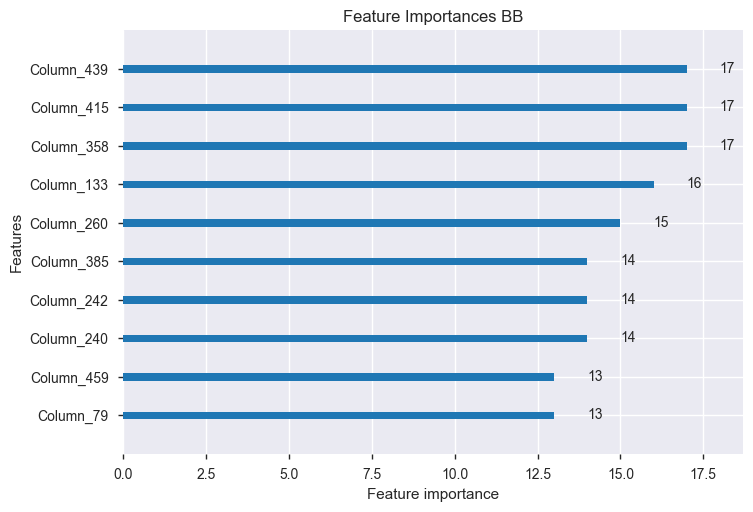

In [50]:
# feature importances
#print('Feature importances:', list(gbm_AA_tuned.feature_importances_))
plt.figure(figsize=(20, 10))
lgb.plot_importance(gbm_BB_tuned, max_num_features=10)
plt.title("Feature Importances BB")

In [51]:
print(AA.tail(1).iloc[:, -1].values, y_pred_lgbAA, y_pred_lgb_AA_tuned)

[0.42205644] [0.36553518] [0.36838347]


In [52]:
print(BB.tail(1).iloc[:, -1].values, y_pred_lgbBB, y_pred_lgb_BB_tuned)

[0.05951859] [-0.07004206] [-0.04531292]


# RANDOM FOREST

In [57]:
rfmodel = RandomForestRegressor()
rfmodel_p = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=1000)

In [58]:
#AA
X=X_features_AA
Y=X_target_AA
rfmodel.fit(X,Y)
rfmodel.predict(y_features_AA)

array([0.39869058])

In [59]:
#BB
x=X_features_BB 
y=X_target_BB
rfmodel.fit(x,y)
rfmodel.predict(y_features_BB)

array([-0.07520843])

In [60]:
#AA
X=X_features_AA
Y=X_target_AA
rfmodel_p.fit(X,Y)
y_pred_rf_AA = rfmodel_p.predict(y_features_AA)
print(y_pred_rf_AA)

[0.37672973]


In [61]:
#BB
x=X_features_BB 
y=X_target_BB
rfmodel_p.fit(x,y)
y_pred_rf_BB = rfmodel.predict(y_features_BB)
print(y_pred_rf_BB)

[-0.07520843]


# XGBOOST

In [63]:
import xgboost
xgbmodel=xgboost.XGBRegressor()
xgbmodel_p=xgboost.XGBRegressor(max_depth=50)

In [64]:
xgbmodel.fit(X,Y)
xgbmodel.predict(y_features_AA)

[22:29:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.35158297], dtype=float32)

In [65]:
xgbmodel.fit(x,y)
xgbmodel.predict(y_features_AA)

[22:29:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.04000458], dtype=float32)

In [66]:
xgbmodel_p.fit(X,Y)
y_pred_xgb_AA = xgbmodel_p.predict(y_features_AA)
print(y_pred_xgb_AA)

[22:29:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.3414655]


In [67]:
xgbmodel_p.fit(x,y)
y_pred_xgb_BB = xgbmodel_p.predict(y_features_BB)
print(y_pred_xgb_BB)

[22:30:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-0.1027208]


## Blending

In [70]:
blendAA = y_pred_lgb_AA_tuned/3+y_pred_rf_AA/3+y_pred_xgb_AA/3
print(blendAA)

[0.3621929]


In [71]:
blendBB = y_pred_lgb_BB_tuned/3+y_pred_rf_BB/3+y_pred_xgb_BB/3
print(blendBB)

[-0.07441405]


In [72]:
blendAA > blendBB

array([ True])

# PART5 Evaluation

In [187]:
AA_eval = AA.T.sort_values(by = AA.T.columns[-2], axis=0, ascending=False).iloc[:, :-1]
AA_eval_top = AA_eval.head(int(len(AA_eval)*(1/100))).index
AA_eval_bot = AA_eval.tail(int(len(AA_eval)*(1/100))).index

In [188]:
AA_eval_top

Index(['2415 錩新', '1410 南染', '5388 中磊', '1529 樂士', '4306 炎洲', '2337 旺宏'], dtype='object', name='公司')

In [189]:
AA_eval_bot

Index(['6108 競國', '2475 華映', '2371 大同', '3051 力特', '2105 正新', '1326 台化'], dtype='object', name='公司')

In [190]:
AA_topten = sum(P_return.loc[AA_eval_top, P_return.columns[-2]])
print(AA_topten)

0.8601356241342913


In [191]:
AA_botten = sum(P_return.loc[AA_eval_bot, P_return.columns[-2]])
print(AA_botten)

-0.5754834215809049


In [192]:
len(AA_eval_top)

6

In [193]:
len(AA_eval_bot)

6

In [195]:
(AA_topten/len(AA_eval_top) - AA_botten/len(AA_eval_bot))

0.23926984095253273

In [196]:
a = 0
for i in range(1, 100, 1):
    AA_eval_top = AA_eval.head(int(len(AA_eval)*(i/100))).index
    AA_eval_bot = AA_eval.tail(int(len(AA_eval)*(i/100))).index
    AA_topten = sum(P_return.loc[AA_eval_top, P_return.columns[-2]])
    AA_botten = sum(P_return.loc[AA_eval_bot, P_return.columns[-2]])
    b = round(AA_topten/len(AA_eval_top) - AA_botten/len(AA_eval_bot), 4)
    if b > a:
        a = b
        s=i
print(s)
print(a)
if a > 0.002013097:
    print("我們打敗大盤了！")

1
0.2393
我們打敗大盤了！


In [197]:
#[台灣]加權股價指數
(9932.26-9554.14)/9554.14

0.03957656052768756